In [1]:
###############################################################################################
############################################Task###############################################
###############################################################################################

In [2]:
"""
Task:

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of 
that the vehicle might have serious issues that prevent it from being sold to customers. The auto community 
calls these unfortunate purchases "kicks".
Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to 
address, issues with getting the vehicle title from the seller, or some other unforeseen problem. 
Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market 
losses in reselling the vehicle.
Modelers who can figure out which cars have a higher risk of being kick can provide real value to 
dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).


Problem:     

The problem is one of classification. The metric can be F1 or Recall, so that category 1 = "bad car" can 
be captured as well as possible. F1 offers the possibility to get the best possible balance between 
recall and precision. Therefore, the metric will be f1.
"""

'\nTask:\n\nOne of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of \nthat the vehicle might have serious issues that prevent it from being sold to customers. The auto community \ncalls these unfortunate purchases "kicks".\nKicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to \naddress, issues with getting the vehicle title from the seller, or some other unforeseen problem. \nKick cars can be very costly to dealers after transportation cost, throw-away repair work, and market \nlosses in reselling the vehicle.\nModelers who can figure out which cars have a higher risk of being kick can provide real value to \ndealerships trying to provide the best inventory selection possible to their customers.\n\nThe challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).\n\n\nProblem:\n\nThe problem is one of classification. The metric can be F1 or Recal

In [3]:
###############################################################################################
############################################Procedure##########################################
###############################################################################################

"""
Please watch for comments that accompany the process and identify findings. 
"""

"""
1. EDA
    1.1 Rename, relabel, dtypes
    1.2 Pairplot: Overview of the data
    1.3 Describe: Summary statistics
    1.4 Overview of categorical features
    1.5 Correlations
    1.6 Outlier Detection
    1.7 Missing Data
2. Train Test Split
3. Data Preparation
4.Imputation
    4.1 Imput kat
    4.2 Imput num
5. Deal with outliers
6. Feature Engineering
7. Dimensionality Reduction
8. Feature Selection
9. Simple Baseline Model
10. Train model XGBoost with HyperOpt
11. Train model XGBoost
12. Feature Importance
13. Finale Datapipeline
14. Confusion Matrix / Classification report
15. Addition: Interpretation with SHAP
16. Addition: Advice to the client

"""

'\n1. EDA\n    1.1 Rename, relabel, dtypes\n    1.2 Pairplot: Overview of the data\n    1.3 Describe: Summary statistics\n    1.4 Overview of categorical features\n    1.5 Correlations\n    1.6 Outlier Detection\n    1.7 Missing Data\n2. Train Test Split\n3. Data Preparation\n4.Imputation\n    4.1 Imput kat\n    4.2 Imput num\n5. Deal with outliers\n6. Feature Engineering\n7. Dimensionality Reduction\n8. Feature Selection\n9. Simple Baseline Model\n10. Train model XGBoost with HyperOpt\n11. Train model XGBoost\n12. Feature Importance\n13. Finale Datapipeline\n14. Confusion Matrix / Classification report\n15. Addition: Interpretation with SHAP\n16. Addition: Advice to the client\n\n'

In [4]:
#import sys
#!{sys.executable} -m pip install --upgrade jupyterthemes


# import modules


import jupyterthemes

!jt  -tfs   9 
!jt -t monokai -T -N -kl


import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
from numpy import nan
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline   
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.display import Image
#pd.set_option('display.max_rows', None)
import pandas as pd
from sklearn.decomposition import PCA

from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

pd.options.display.float_format = '{:.2f}'.format
#np.set_printoptions(suppress=True)
from datetime import date



import cpi
#cpi.update()


from statsmodels.robust import mad
from sklearn.model_selection import train_test_split
#plt.style.use('dark_background')
import re
import gc
import scipy
import scipy.stats
from  scipy import stats
from  scipy.stats import median_abs_deviation as MAD
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.impute import KNNImputer
import os


from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

import pickle
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 


from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.preprocessing import OrdinalEncoder
categorical_transformer = OrdinalEncoder()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
scaler = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

pd.set_option('display.max_columns', None)
pd.options.display.width = 0

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings("ignore")

from warnings import simplefilter
simplefilter("ignore", category=RuntimeWarning)

from joblib.externals.loky import set_loky_pickler
set_loky_pickler("dill")

import graphviz
import shap
from shap import TreeExplainer, Explanation

In [5]:
###############################################################################################
##########################################1. EDA################################################
###############################################################################################

In [6]:
df_start = pd.read_csv('training.csv')

In [7]:

#1.1 Rename, relabel, dtypes
df_start.rename(columns={'IsBadBuy': 'Montagsauto', 'PurchDate': 'Date_Buy_Auction','Auction': 'Auktionsanbieter',
                   'VehYear': 'Baujahr','VehicleAge': 'VAge_Auc_Buy','Make': 'KFZ_Herst','Model': 'KFZ_Model',
                   'Trim': 'KFZ_Austatt','SubModel': 'KFZ_SubModel','Transmission': 'Getriebe',
                   'WheelTypeID': 'Felgen_ID', 'WheelType': 'Felgen_Art', 'VehOdo': 'KFZ_MeilenSta',
                   'Nationality': 'Land_Herst','Size': 'Größenklasse','AUCGUART': 'Garant_vorhanden', 
                   'BYRNO': 'Käufer_Nr', 'VNZIP1': 'PLZ', 'VehBCost': 'Anschaffungskosten', 
                   'IsOnlineSale': 'Online_Kauf', 'WarrantyCost': 'Garant_Kosten36', 
                   'VNST': 'Bundesstaat','PRIMEUNIT':'Prime'}, inplace=True)


#Relabel
df_start.loc[:, 'Getriebe'] = df_start.loc[:, 'Getriebe'].replace({'MANUAL':'Manual'})
df_start.loc[:, 'Color'] = df_start.loc[:, 'Color'].replace({'NOT AVAIL':nan})

#Dtypes
df_start.loc[:, 'Auktionsanbieter'] = df_start.loc[:, 'Auktionsanbieter'].astype('object')
df_start.loc[:, 'Baujahr'] = df_start.loc[:, 'Baujahr'].astype('Int64')
df_start.loc[:, 'VAge_Auc_Buy'] = df_start.loc[:, 'VAge_Auc_Buy'].astype('Int64')
df_start.loc[:, 'KFZ_Herst'] = df_start.loc[:, 'KFZ_Herst'].astype('object')
df_start.loc[:, 'KFZ_Model'] = df_start.loc[:, 'KFZ_Model'].astype('object')
df_start.loc[:, 'KFZ_Austatt'] = df_start.loc[:, 'KFZ_Austatt'].astype('object')
df_start.loc[:, 'KFZ_MeilenSta'] = df_start.loc[:, 'KFZ_MeilenSta'].astype('Int64')
df_start.loc[:, 'Felgen_Art'] = df_start.loc[:, 'Felgen_Art'].astype('object')
df_start.loc[:, 'Montagsauto'] = df_start.loc[:, 'Montagsauto'].astype('object')
df_start.loc[:, 'KFZ_SubModel'] = df_start.loc[:, 'KFZ_SubModel'].astype('object')
df_start.loc[:, 'Land_Herst'] = df_start.loc[:, 'Land_Herst'].astype('object')
df_start.loc[:, 'Date_Buy_Auction'] = pd.to_datetime(df_start.loc[:, 'Date_Buy_Auction'])
df_start.loc[:, 'Getriebe'] = df_start.loc[:, 'Getriebe'].astype('object')
df_start.loc[:, 'Garant_vorhanden'] = df_start.loc[:, 'Garant_vorhanden'].astype('object')
df_start.loc[:, 'Prime'] = df_start.loc[:, 'Prime'].astype('object')
df_start.loc[:, 'TopThreeAmericanName'] = df_start.loc[:, 'TopThreeAmericanName'].astype('object')
df_start.loc[:, 'Größenklasse'] = df_start.loc[:, 'Größenklasse'].astype('object')
df_start.loc[:, 'Bundesstaat'] = df_start.loc[:, 'Bundesstaat'].astype('object')
df_start.loc[:, 'Color'] = df_start.loc[:, 'Color'].astype('object')
df_start.loc[:, 'Garant_Kosten36'] = df_start.loc[:, 'Garant_Kosten36'].astype('Int64')
df_start.loc[:, 'Felgen_ID'] = df_start.loc[:, 'Felgen_ID'].astype('object')
df_start.loc[:, 'MMRAcquisitionAuctionAveragePrice'] = df_start.loc[:, 'MMRAcquisitionAuctionAveragePrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'MMRAcquisitionAuctionCleanPrice'] = df_start.loc[:, 'MMRAcquisitionAuctionCleanPrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'MMRAcquisitionRetailAveragePrice'] = df_start.loc[:, 'MMRAcquisitionRetailAveragePrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'MMRAcquisitonRetailCleanPrice'] = df_start.loc[:, 'MMRAcquisitonRetailCleanPrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'MMRCurrentAuctionAveragePrice'] = df_start.loc[:, 'MMRCurrentAuctionAveragePrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'MMRCurrentAuctionCleanPrice'] = df_start.loc[:, 'MMRCurrentAuctionCleanPrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'MMRCurrentRetailAveragePrice'] = df_start.loc[:, 'MMRCurrentRetailAveragePrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'MMRCurrentRetailCleanPrice'] = df_start.loc[:, 'MMRCurrentRetailCleanPrice'].astype('Int64', errors='ignore')
df_start.loc[:, 'Käufer_Nr'] = df_start.loc[:, 'Käufer_Nr'].astype('object')
df_start.loc[:, 'PLZ'] = df_start.loc[:, 'PLZ'].astype('object')
df_start.loc[:, 'Anschaffungskosten'] = df_start.loc[:, 'Anschaffungskosten'].astype('Int64', errors='ignore')
df_start.loc[:, 'Online_Kauf'] = df_start.loc[:, 'Online_Kauf'].astype('object')



'\nObservations\n\n1. correlations of MMR F. with each other and with acquisition costs VAge_Auc_Bu, year of construction and warranty36.\n2. outliers in price F.\n3. online purchase measures almost only one value: can be deleted.\n\n'

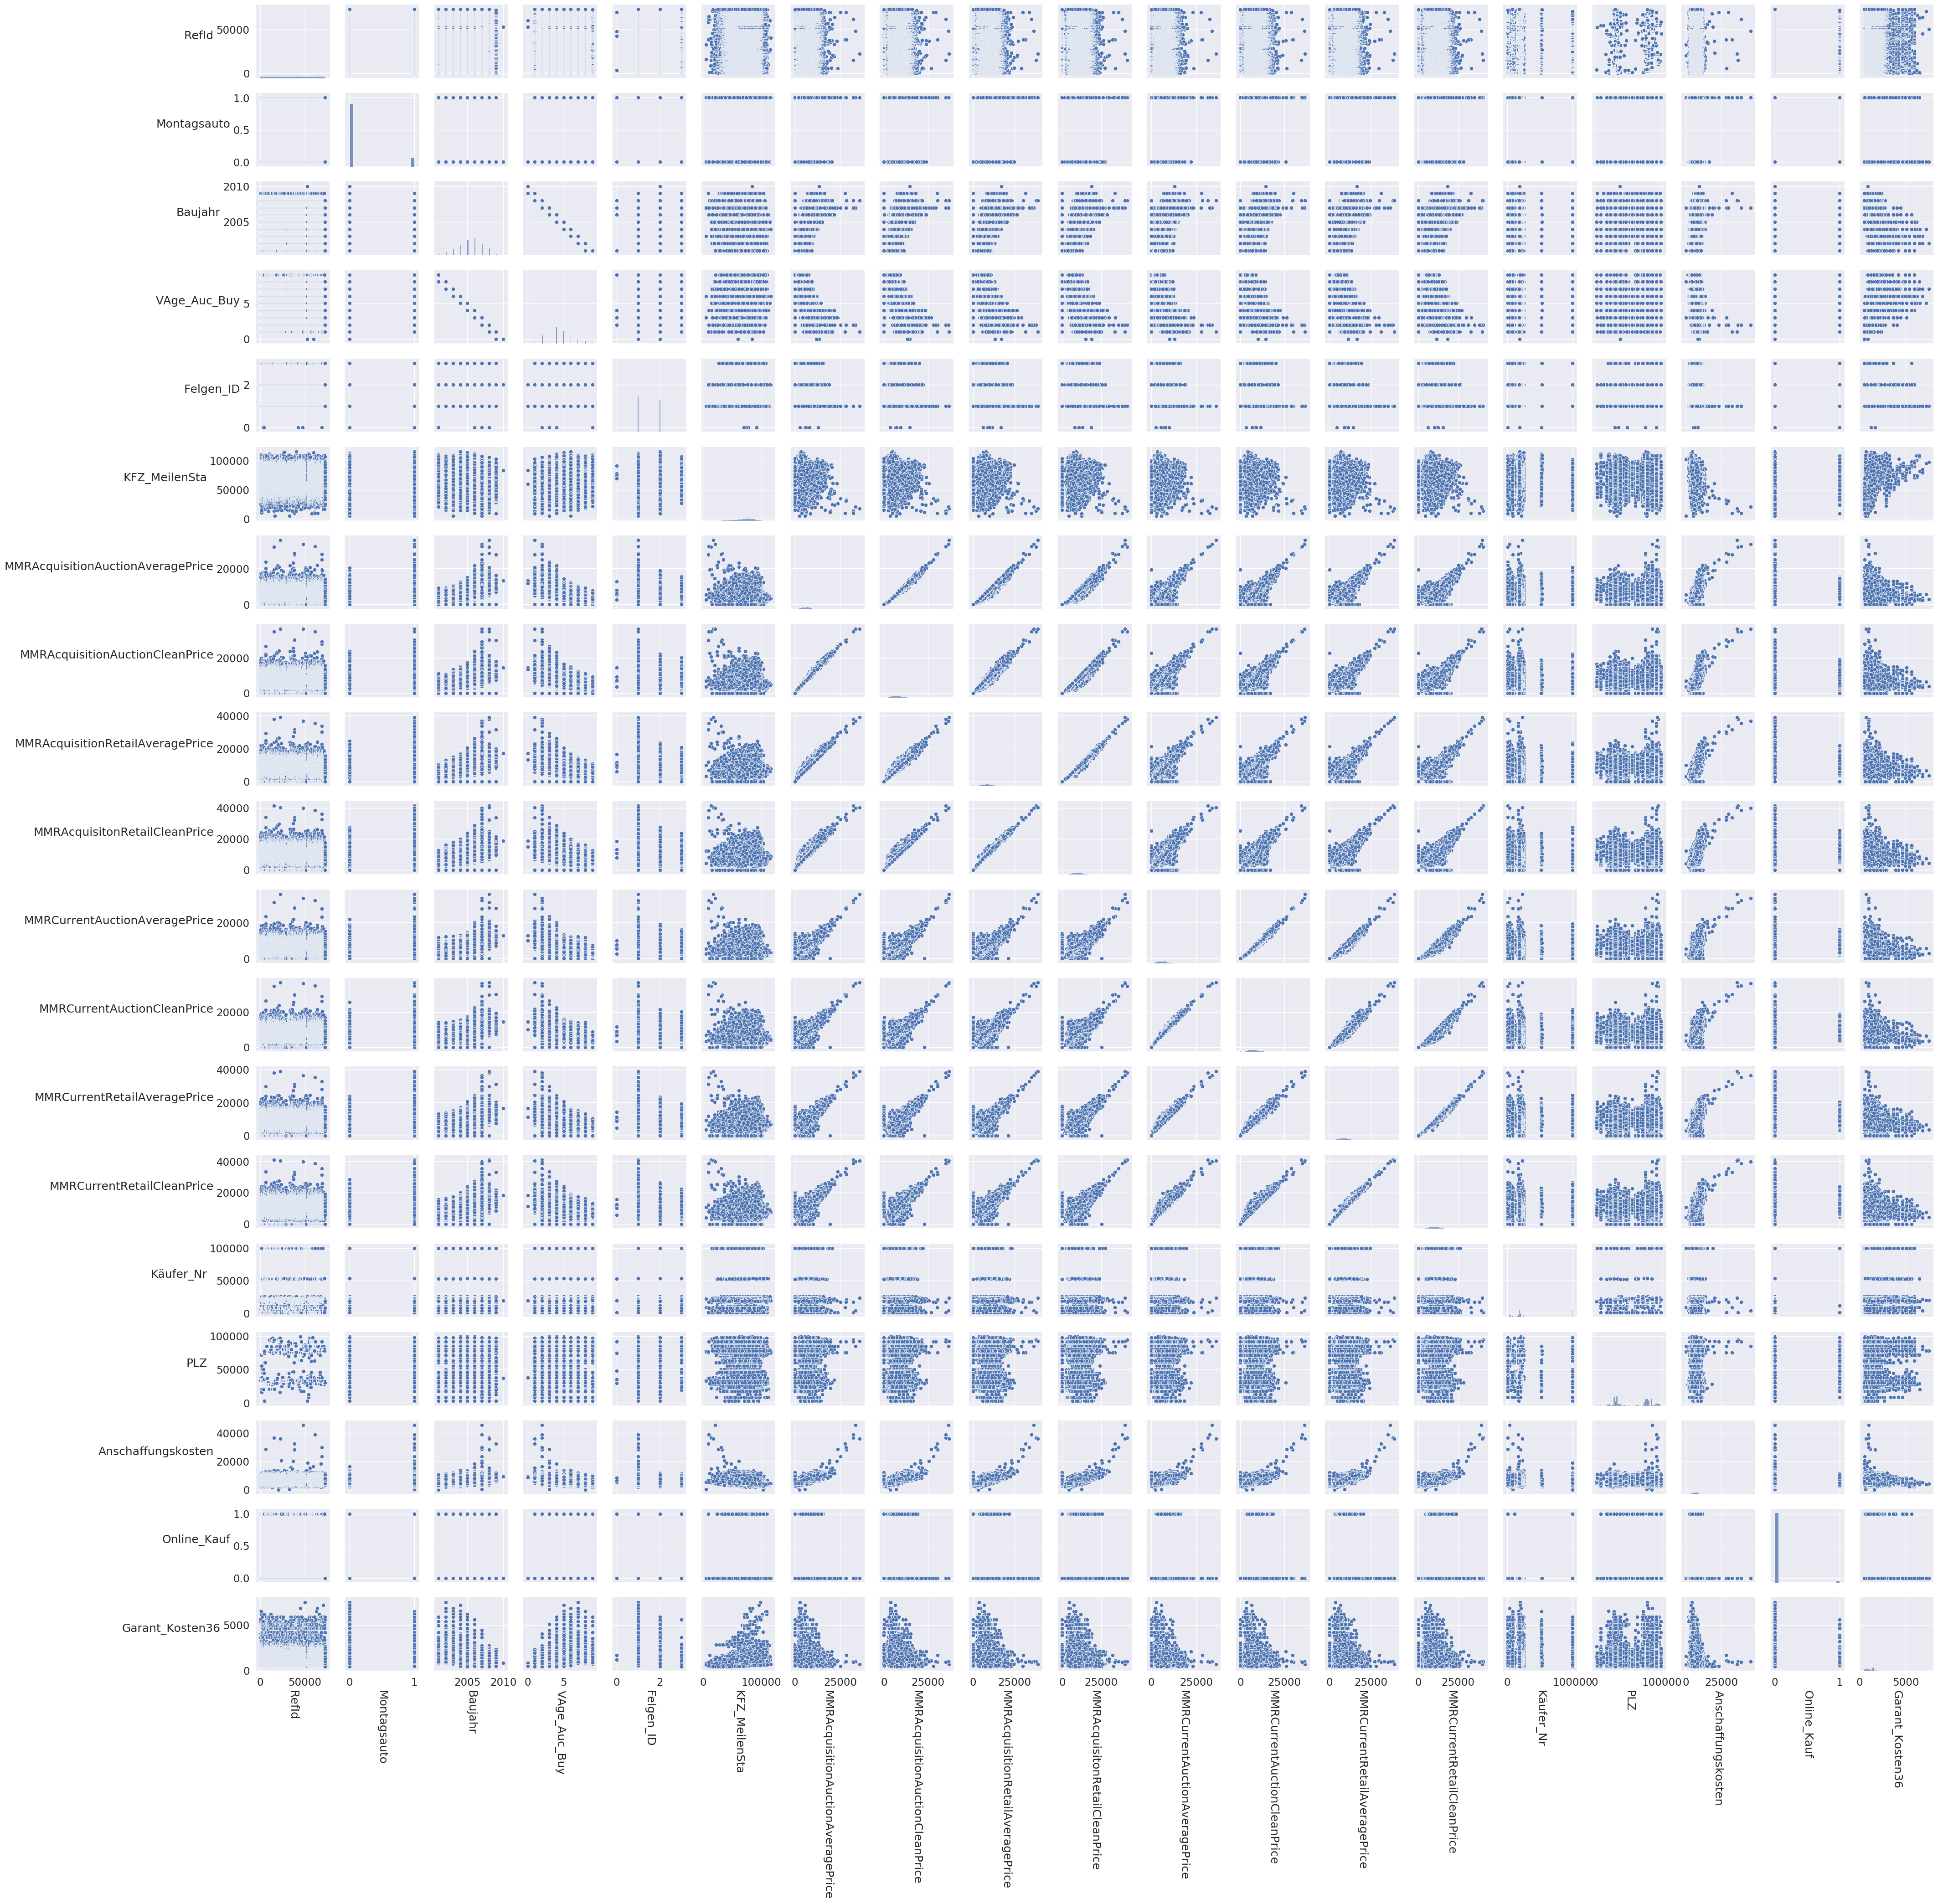

In [8]:
#1.2 Pairplot: Overview of the data



sns.set(font_scale=1.5) #make fonts bigger
g = sns.pairplot(data=df_start)
plt.tight_layout()
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')


        
        
"""
Observations

1. correlations of MMR F. with each other and with acquisition costs VAge_Auc_Bu, year of construction and warranty36.
2. outliers in price F.
3. online purchase measures almost only one value: can be deleted.

"""


In [9]:
#1.3 Describe: Summary statistics


display(df_start.describe())


"""
Observations:

1. 0 as min values of MMRF.
2. 1 as minvalue of acquisition cost.
3. VAge_Auc_Buy with minvalue 0.0

"""

#Check the values 0 for the MMR F. and 1 for acquisition costs.

mask = df_start.loc[:,'Anschaffungskosten'] == 1
print(len(df_start[mask]))
display(df_start[mask].drop_duplicates())


mask = df_start.loc[:,'MMRCurrentAuctionAveragePrice'] == 0
print(len(df_start[mask]))
display(df_start[mask].drop_duplicates())



"""
Observations:

Acquisition cost:
The value 1 relates to a specific type. This value should be retained, even if it is an outlier

MMR:

The value 0 concerns many types. Therefore, it can be assumed that these are missing values that are only labeled as 0
labeled.
"""

RefId  Baujahr  VAge_Auc_Buy  KFZ_MeilenSta  \
count 72983.00 72983.00      72983.00       72983.00   
mean  36511.43  2005.34          4.18       71500.00   
std   21077.24     1.73          1.71       14578.91   
min       1.00  2001.00          0.00        4825.00   
25%   18257.50  2004.00          3.00       61837.00   
50%   36514.00  2005.00          4.00       73361.00   
75%   54764.50  2007.00          5.00       82436.00   
max   73014.00  2010.00          9.00      115717.00   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
count                           72965.00                         72965.00   
mean                             6128.91                          7373.64   
std                              2461.99                          2722.49   
min                                 0.00                             0.00   
25%                              4273.00                          5406.00   
50%                              6097.00                          7303.00   
75%                              7765.00                          9021.00   
max                             35722.00                         36859.00   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
count                          72965.00                       72965.00   
mean                            8497.03                        9850.93   
std                             3156.29                        3385.79   
min                                0.00                           0.00   
25%                             6280.00                        7493.00   
50%                             8444.00                        9789.00   
75%                            10651.00                       12088.00   
max                            39080.00                       41482.00   

       MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
count                       72668.00                     72668.00   
mean                         6132.08                      7390.68   
std                          2434.57                      2686.25   
min                             0.00                         0.00   
25%                          4275.00                      5414.00   
50%                          6062.00                      7313.00   
75%                          7736.00                      9013.00   
max                         35722.00                     36859.00   

       MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice  \
count                      72668.00                    72668.00   
mean                        8775.72                    10145.39   
std                         3090.70                     3310.25   
min                            0.00                        0.00   
25%                         6536.00                     7784.00   
50%                         8729.00                    10103.00   
75%                        10911.00                    12309.00   
max                        39080.00                    41062.00   

       Anschaffungskosten  Garant_Kosten36  
count            72983.00         72983.00  
mean              6730.93          1276.58  
std               1767.85           598.85  
min                  1.00           462.00  
25%               5435.00           837.00  
50%               6700.00          1155.00  
75%               7900.00          1623.00  
max              45469.00          7498.00

1


RefId Montagsauto Date_Buy_Auction Auktionsanbieter  Baujahr  \
20442  20455           1       2009-01-19            OTHER     2001   

       VAge_Auc_Buy KFZ_Herst             KFZ_Model KFZ_Austatt  KFZ_SubModel  \
20442             8     DODGE  DAKOTA PICKUP 2WD 4C         Bas  EXT CAB 2.5L   

      Color Getriebe Felgen_ID Felgen_Art  KFZ_MeilenSta Land_Herst  \
20442   RED     AUTO       NaN        NaN         102641   AMERICAN   

      Größenklasse TopThreeAmericanName  MMRAcquisitionAuctionAveragePrice  \
20442  SMALL TRUCK             CHRYSLER                               2411   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
20442                             3449                              3104   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
20442                           4225                           2402   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
20442                         3440                          3094   

       MMRCurrentRetailCleanPrice Prime Garant_vorhanden Käufer_Nr    PLZ  \
20442                        4215   NaN              NaN     99761  85018   

      Bundesstaat  Anschaffungskosten Online_Kauf  Garant_Kosten36  
20442          AZ                1.00           0             1590

504


RefId Montagsauto Date_Buy_Auction Auktionsanbieter  Baujahr  \
416      417           1       2010-12-20            ADESA     2003   
431      432           1       2009-08-19            ADESA     2007   
523      524           0       2009-09-30            ADESA     2007   
820      822           0       2009-07-28            ADESA     2005   
1092    1094           0       2010-11-23            ADESA     2004   
...      ...         ...              ...              ...      ...   
72455  72487           0       2009-02-25            ADESA     2005   
72476  72508           0       2009-02-25            ADESA     2007   
72698  72730           0       2009-07-01            ADESA     2002   
72774  72806           0       2009-08-19            ADESA     2005   
72779  72811           0       2009-08-19            ADESA     2007   

       VAge_Auc_Buy  KFZ_Herst             KFZ_Model KFZ_Austatt  \
416               7  CHEVROLET           CAVALIER 4C          LS   
431               2  CHEVROLET  UPLANDER FWD V6 3.9L          LS   
523               2  CHEVROLET  UPLANDER FWD V6 3.9L          LS   
820               4   CHRYSLER  PACIFICA FWD 3.8L V6         Bas   
1092              6      DODGE  DAKOTA PICKUP 2WD V8         Spo   
...             ...        ...                   ...         ...   
72455             4   CHRYSLER  PACIFICA FWD 3.8L V6         Bas   
72476             2  CHEVROLET  UPLANDER FWD V6 3.9L          LS   
72698             7       JEEP  GRAND CHEROKEE 2WD V         Lim   
72774             4   CHRYSLER  PACIFICA FWD 3.8L V6         Bas   
72779             2  CHEVROLET  UPLANDER FWD V6 3.9L          LS   

              KFZ_SubModel   Color Getriebe Felgen_ID Felgen_Art  \
416      4D SEDAN LS SPORT  SILVER     AUTO      1.00      Alloy   
431     PASSENGER EXT 3.5L    GREY     AUTO      1.00      Alloy   
523     PASSENGER EXT 3.5L  SILVER     AUTO      2.00     Covers   
820               4D SPORT   GREEN     AUTO      2.00     Covers   
1092   QUAD CAB 4.7L SPORT  SILVER     AUTO      1.00      Alloy   
...                    ...     ...      ...       ...        ...   
72455             4D SPORT    BLUE     AUTO      1.00      Alloy   
72476   PASSENGER EXT 3.5L  SILVER     AUTO      1.00      Alloy   
72698             4D WAGON    GREY     AUTO      1.00      Alloy   
72774             4D SPORT    BLUE     AUTO      2.00     Covers   
72779   PASSENGER EXT 3.5L  MAROON     AUTO      2.00     Covers   

       KFZ_MeilenSta Land_Herst Größenklasse TopThreeAmericanName  \
416            92537   AMERICAN      COMPACT                   GM   
431            81858   AMERICAN          VAN                   GM   
523            87459   AMERICAN          VAN                   GM   
820            69424   AMERICAN    CROSSOVER             CHRYSLER   
1092           93415   AMERICAN  SMALL TRUCK             CHRYSLER   
...              ...        ...          ...                  ...   
72455          58179   AMERICAN    CROSSOVER             CHRYSLER   
72476          64665   AMERICAN          VAN                   GM   
72698          86906   AMERICAN   MEDIUM SUV             CHRYSLER   
72774          82412   AMERICAN    CROSSOVER             CHRYSLER   
72779          82700   AMERICAN          VAN                   GM   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
416                                 1915                             2761   
431                                    0                                0   
523                                    0                                0   
820                                    0                                0   
1092                                   0                                0   
...                                  ...                              ...   
72455                                  0                                1   
72476                                  0                                1  

'\nObservations:\n\nAcquisition cost:\nThe value 1 relates to a specific type. This value should be retained, even if it is an outlier\n\nMMR:\n\nThe value 0 concerns many types. Therefore, it can be assumed that these are missing values that are only labeled as 0\nlabeled.\n'

In [10]:
#1.4 Overview of categorical features


kat_cols = ['KFZ_Herst','KFZ_Model','KFZ_Austatt', 'KFZ_SubModel', 'Color', 'Getriebe', 'Felgen_ID', 
           'Felgen_Art', 'Land_Herst', 'Größenklasse', 'TopThreeAmericanName', 
           'PLZ', 'Bundesstaat']

for col in kat_cols:
    count = df_start[col].value_counts().sort_values()
    print('\n')
    print("" + col + "")
    print('\n')
    print(count)
    print('\n')



"""
Observations

1. KFZ_Herst has too many models and has correct labels.
2. KFZ_Model has too many characteristics with useless labels. 
3. KFZ_Austatt has too many characteristics with useless labels. 
4. KFZ_SubModel has too many values with useless labels. 
5. Felgen_ID has one expression with 4 observations: Examine together with rim type. 
6. PLZ must be reduced in the characteristics.

"""

#Felgen_Art and Felgen_ID



display(df_start.loc[:,['Felgen_ID','Felgen_Art']].drop_duplicates().sort_values(by = ['Felgen_ID', 
                     'Felgen_Art'], ascending = True).head(50))
                     


"""
Both measure the same: Felgen_ID has one more cat. At this point, Felgen_Art has NaN.  
"""







KFZ_Herst


HUMMER              1
TOYOTA SCION        1
PLYMOUTH            2
MINI               24
SUBARU             28
LEXUS              31
ACURA              33
CADILLAC           33
VOLVO              37
INFINITI           42
LINCOLN            97
SCION             129
ISUZU             134
VOLKSWAGEN        134
OLDSMOBILE        243
HONDA             497
GMC               649
BUICK             720
MERCURY           913
MAZDA             979
MITSUBISHI       1030
TOYOTA           1144
SUZUKI           1328
JEEP             1644
HYUNDAI          1811
NISSAN           2085
SATURN           2163
KIA              2484
PONTIAC          4258
CHRYSLER         8844
FORD            11305
DODGE           12912
CHEVROLET       17248
Name: KFZ_Herst, dtype: int64




KFZ_Model


PATRIOT 2WD 4C 2.0L        1
MALIBU 4C 2.2L I-4 M       1
SEDONA 3.5L V6 EFI         1
AVENGER V6 2.7L V6 M       1
4 RUNNER 4WD V6            1
                        ... 
CARAVAN GRAND FWD V6    1289
CALIBER    

Felgen_ID Felgen_Art
2992      0.00        NaN
0         1.00      Alloy
2         2.00     Covers
212       3.00    Special
39         NaN        NaN

'\nBoth measure the same: Felgen_ID has one more cat. At this point, Felgen_Art has NaN.  \n'

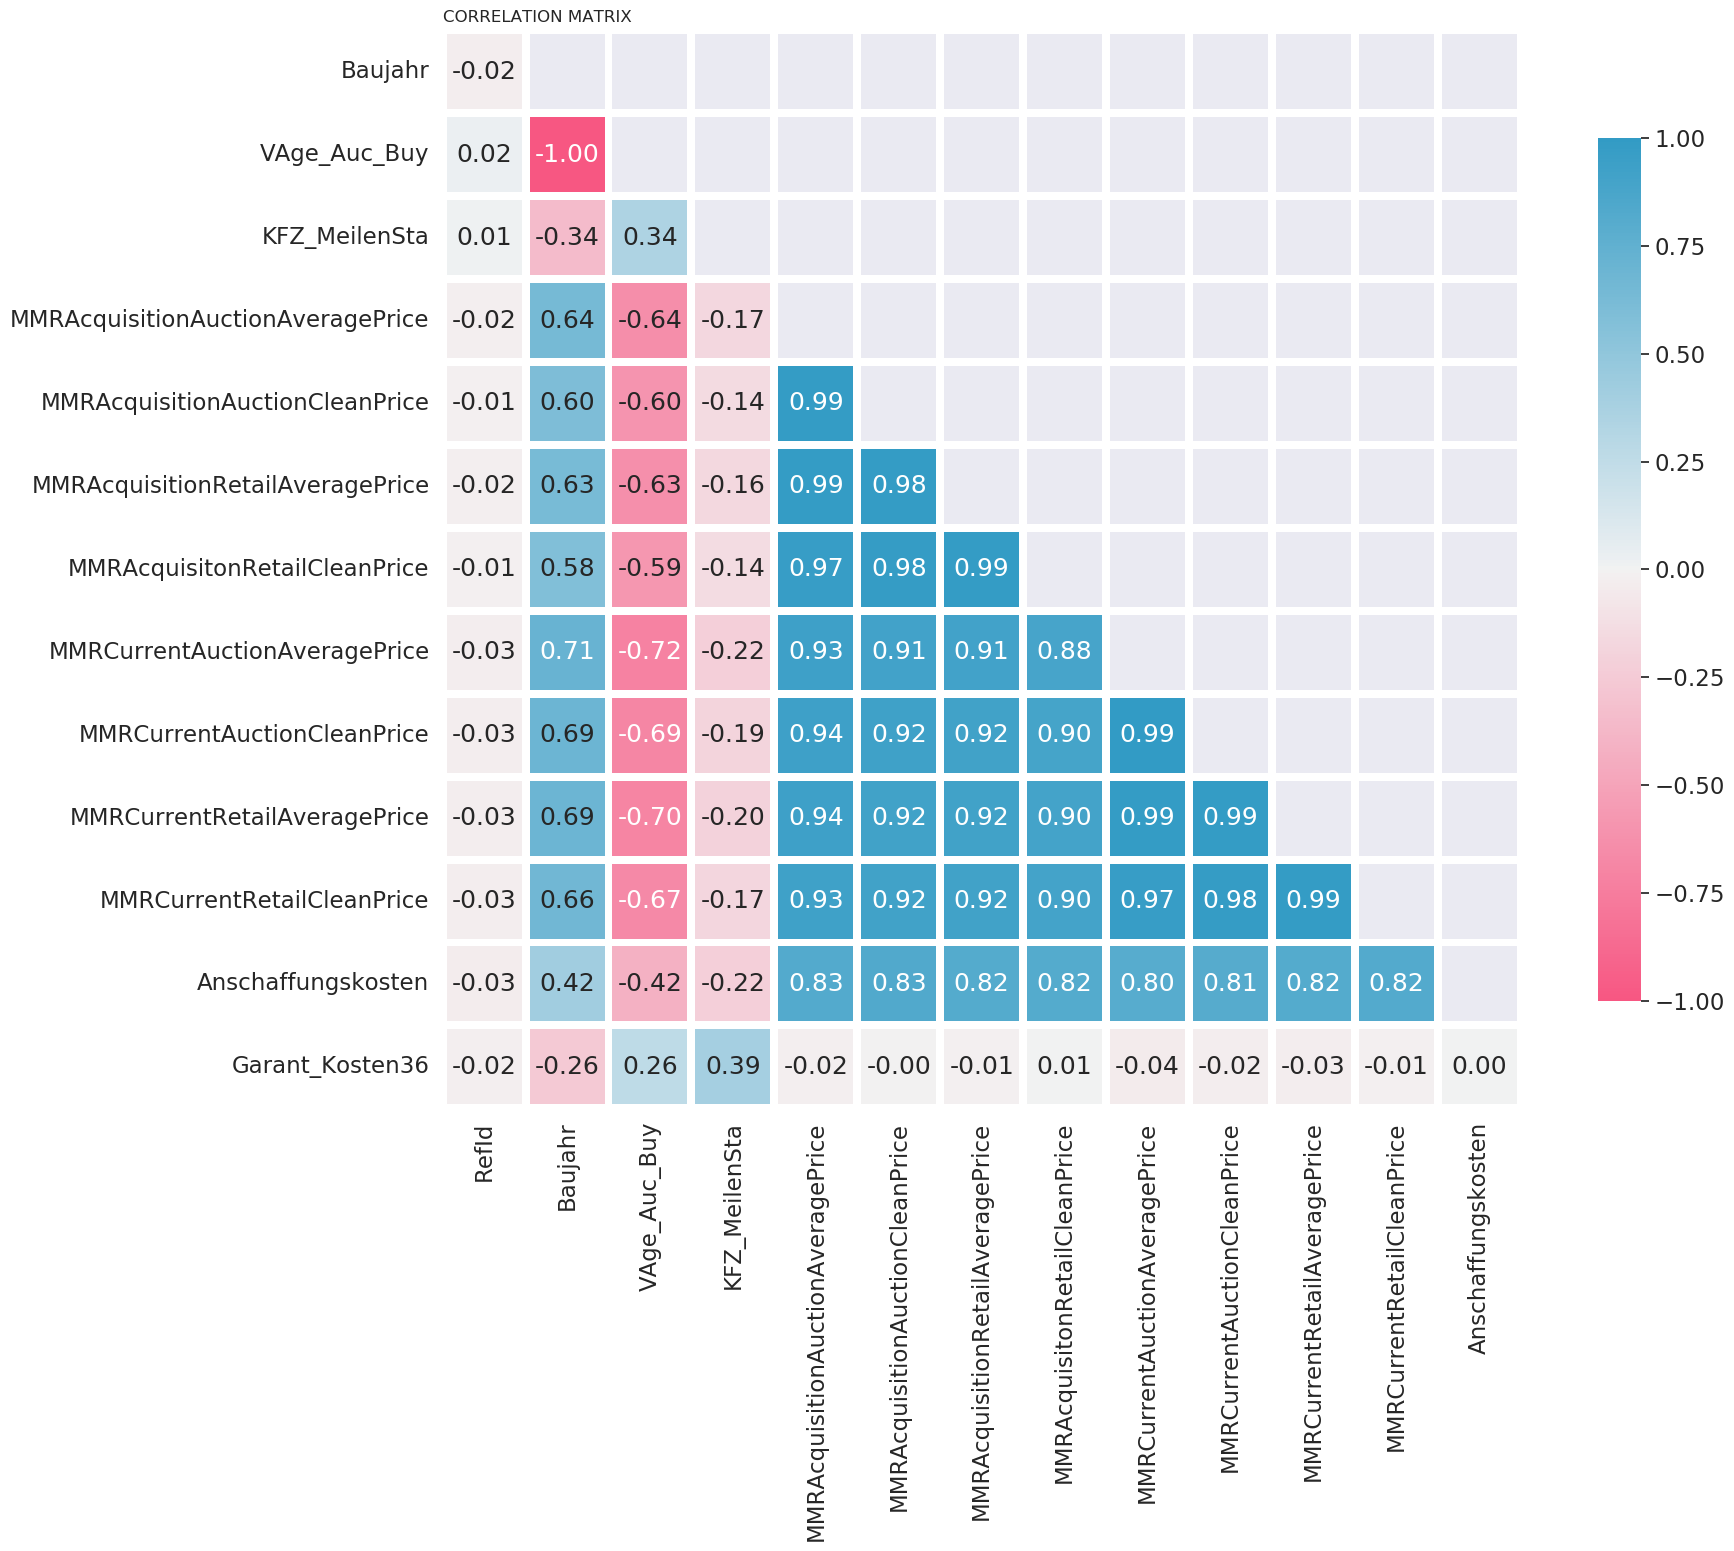

'\nThe price F. are highly correlated. VAge_Auc_Buy or year of manufacture can be excluded.\nCar year/VAge_Auc_Buy are also highly correlated with price F.  \nOnly warranty and vehicle mileage have with all F. the lowest correlation and among themselves a low correlation.\n'

In [11]:
#1.5 Correlations

#Corr df
corr_out = df_start.dropna().corr()

fig, ax = plt.subplots(figsize=(20, 14))

# mask
mask = np.triu(np.ones_like(corr_out, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = corr_out.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

#Fontsize
sns.set(font_scale=1)

#Ylim
ax.set_ylim(len(corr.columns),0)

# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=12)


plt.show()

"""
The price F. are highly correlated. VAge_Auc_Buy or year of manufacture can be excluded.
Car year/VAge_Auc_Buy are also highly correlated with price F.  
Only warranty and vehicle mileage have with all F. the lowest correlation and among themselves a low correlation.
"""

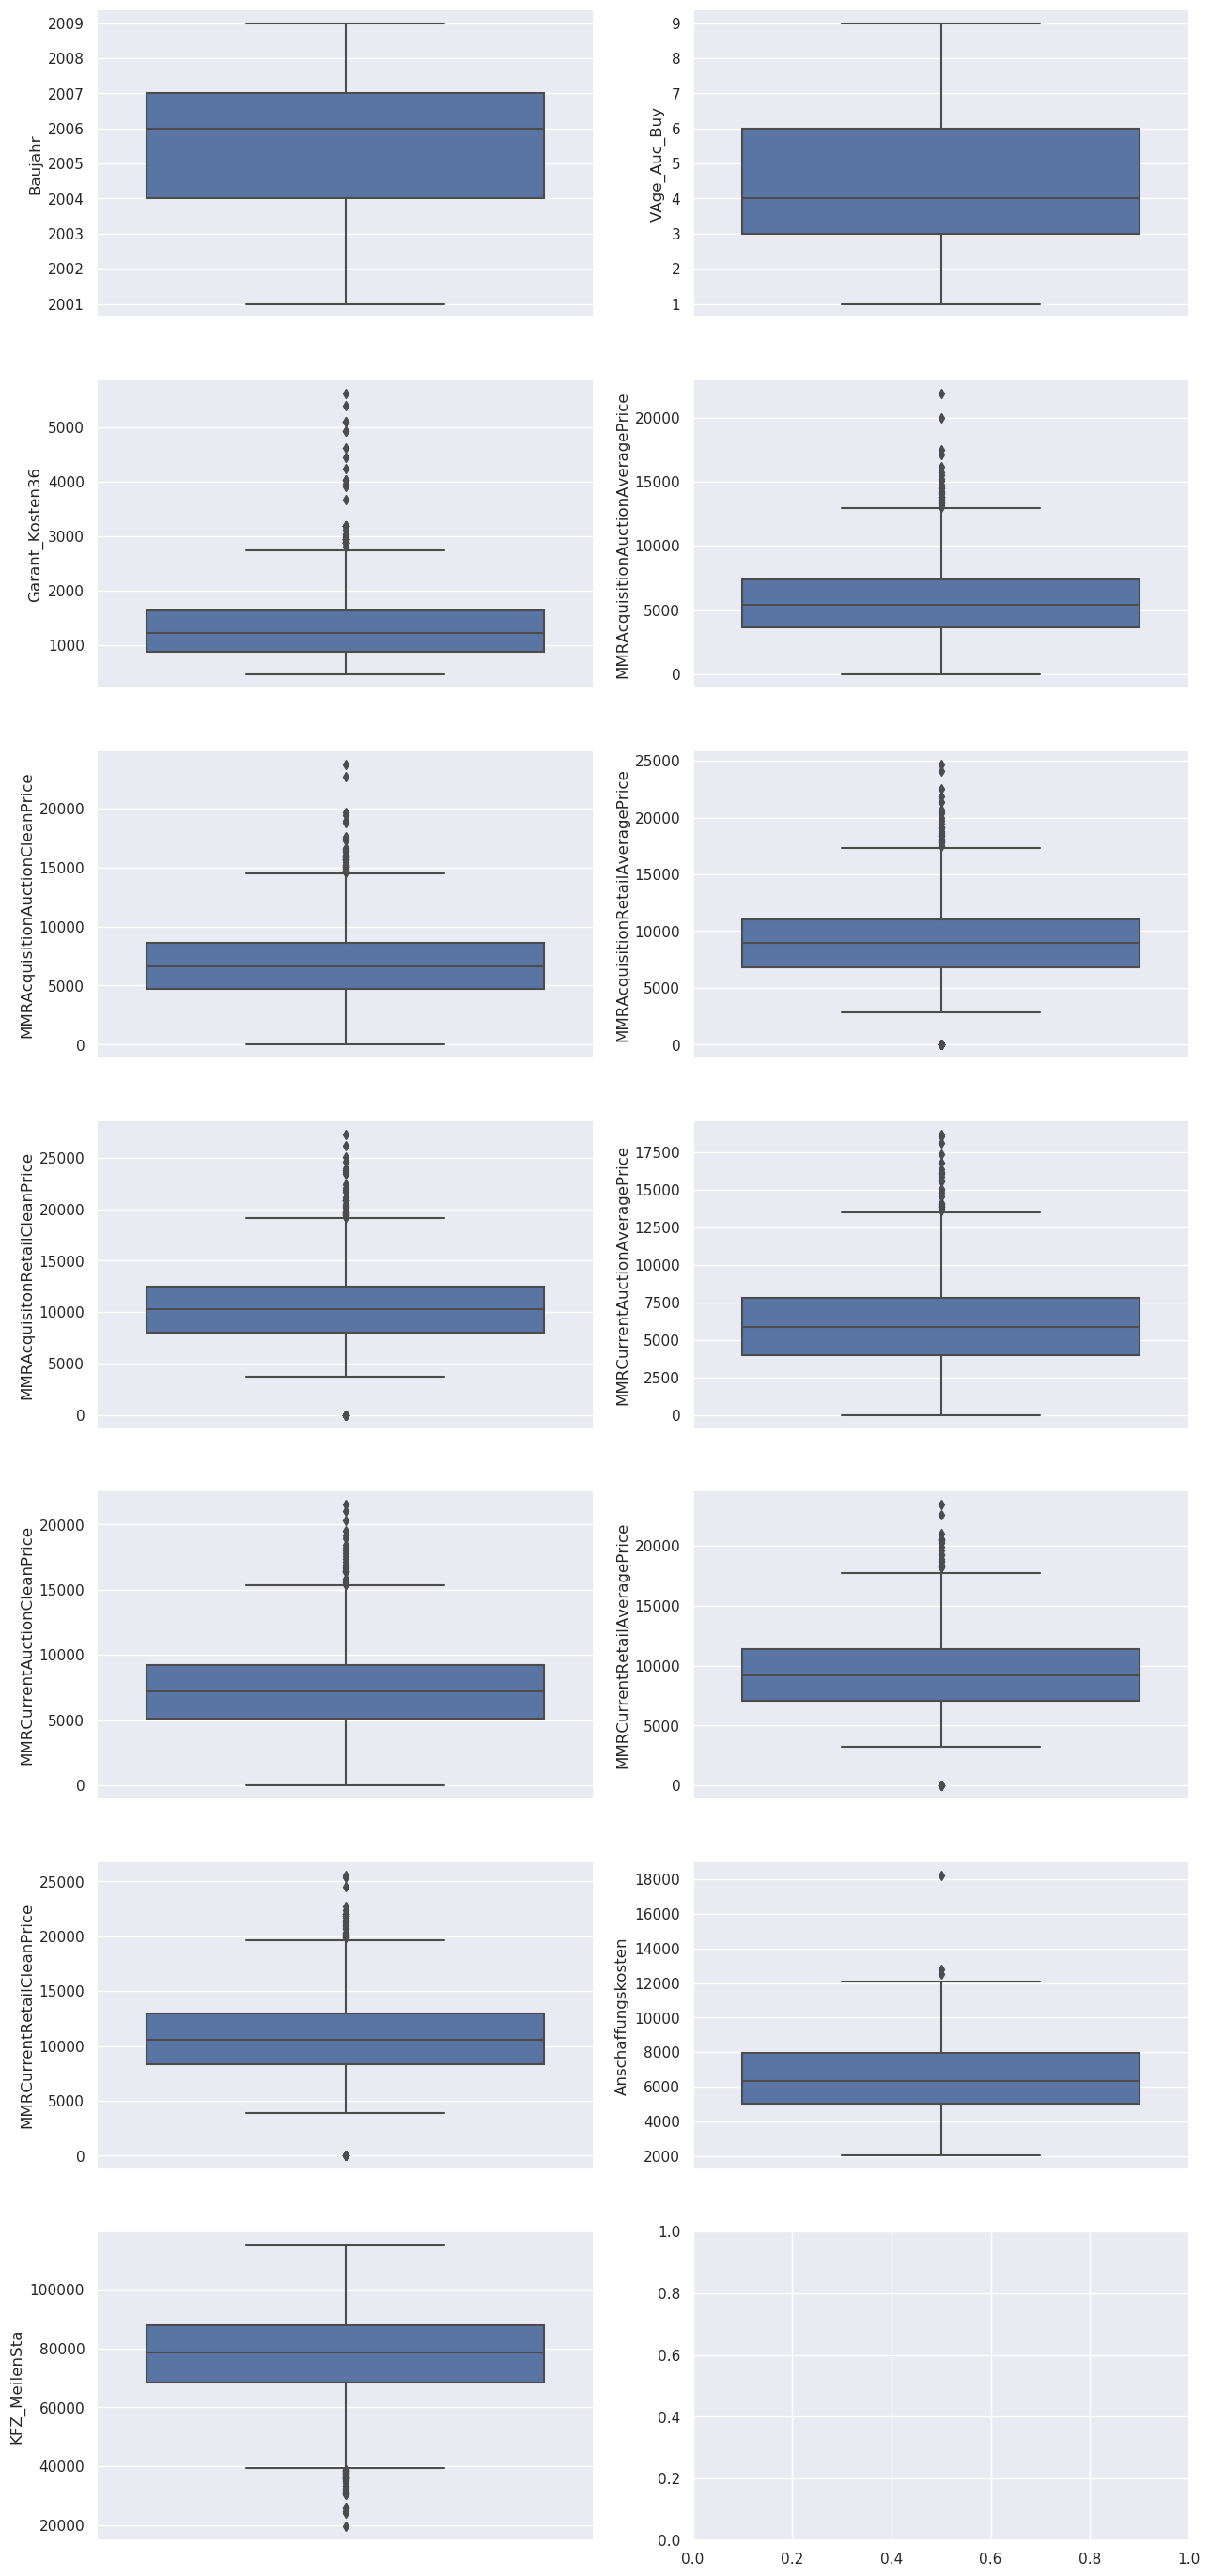

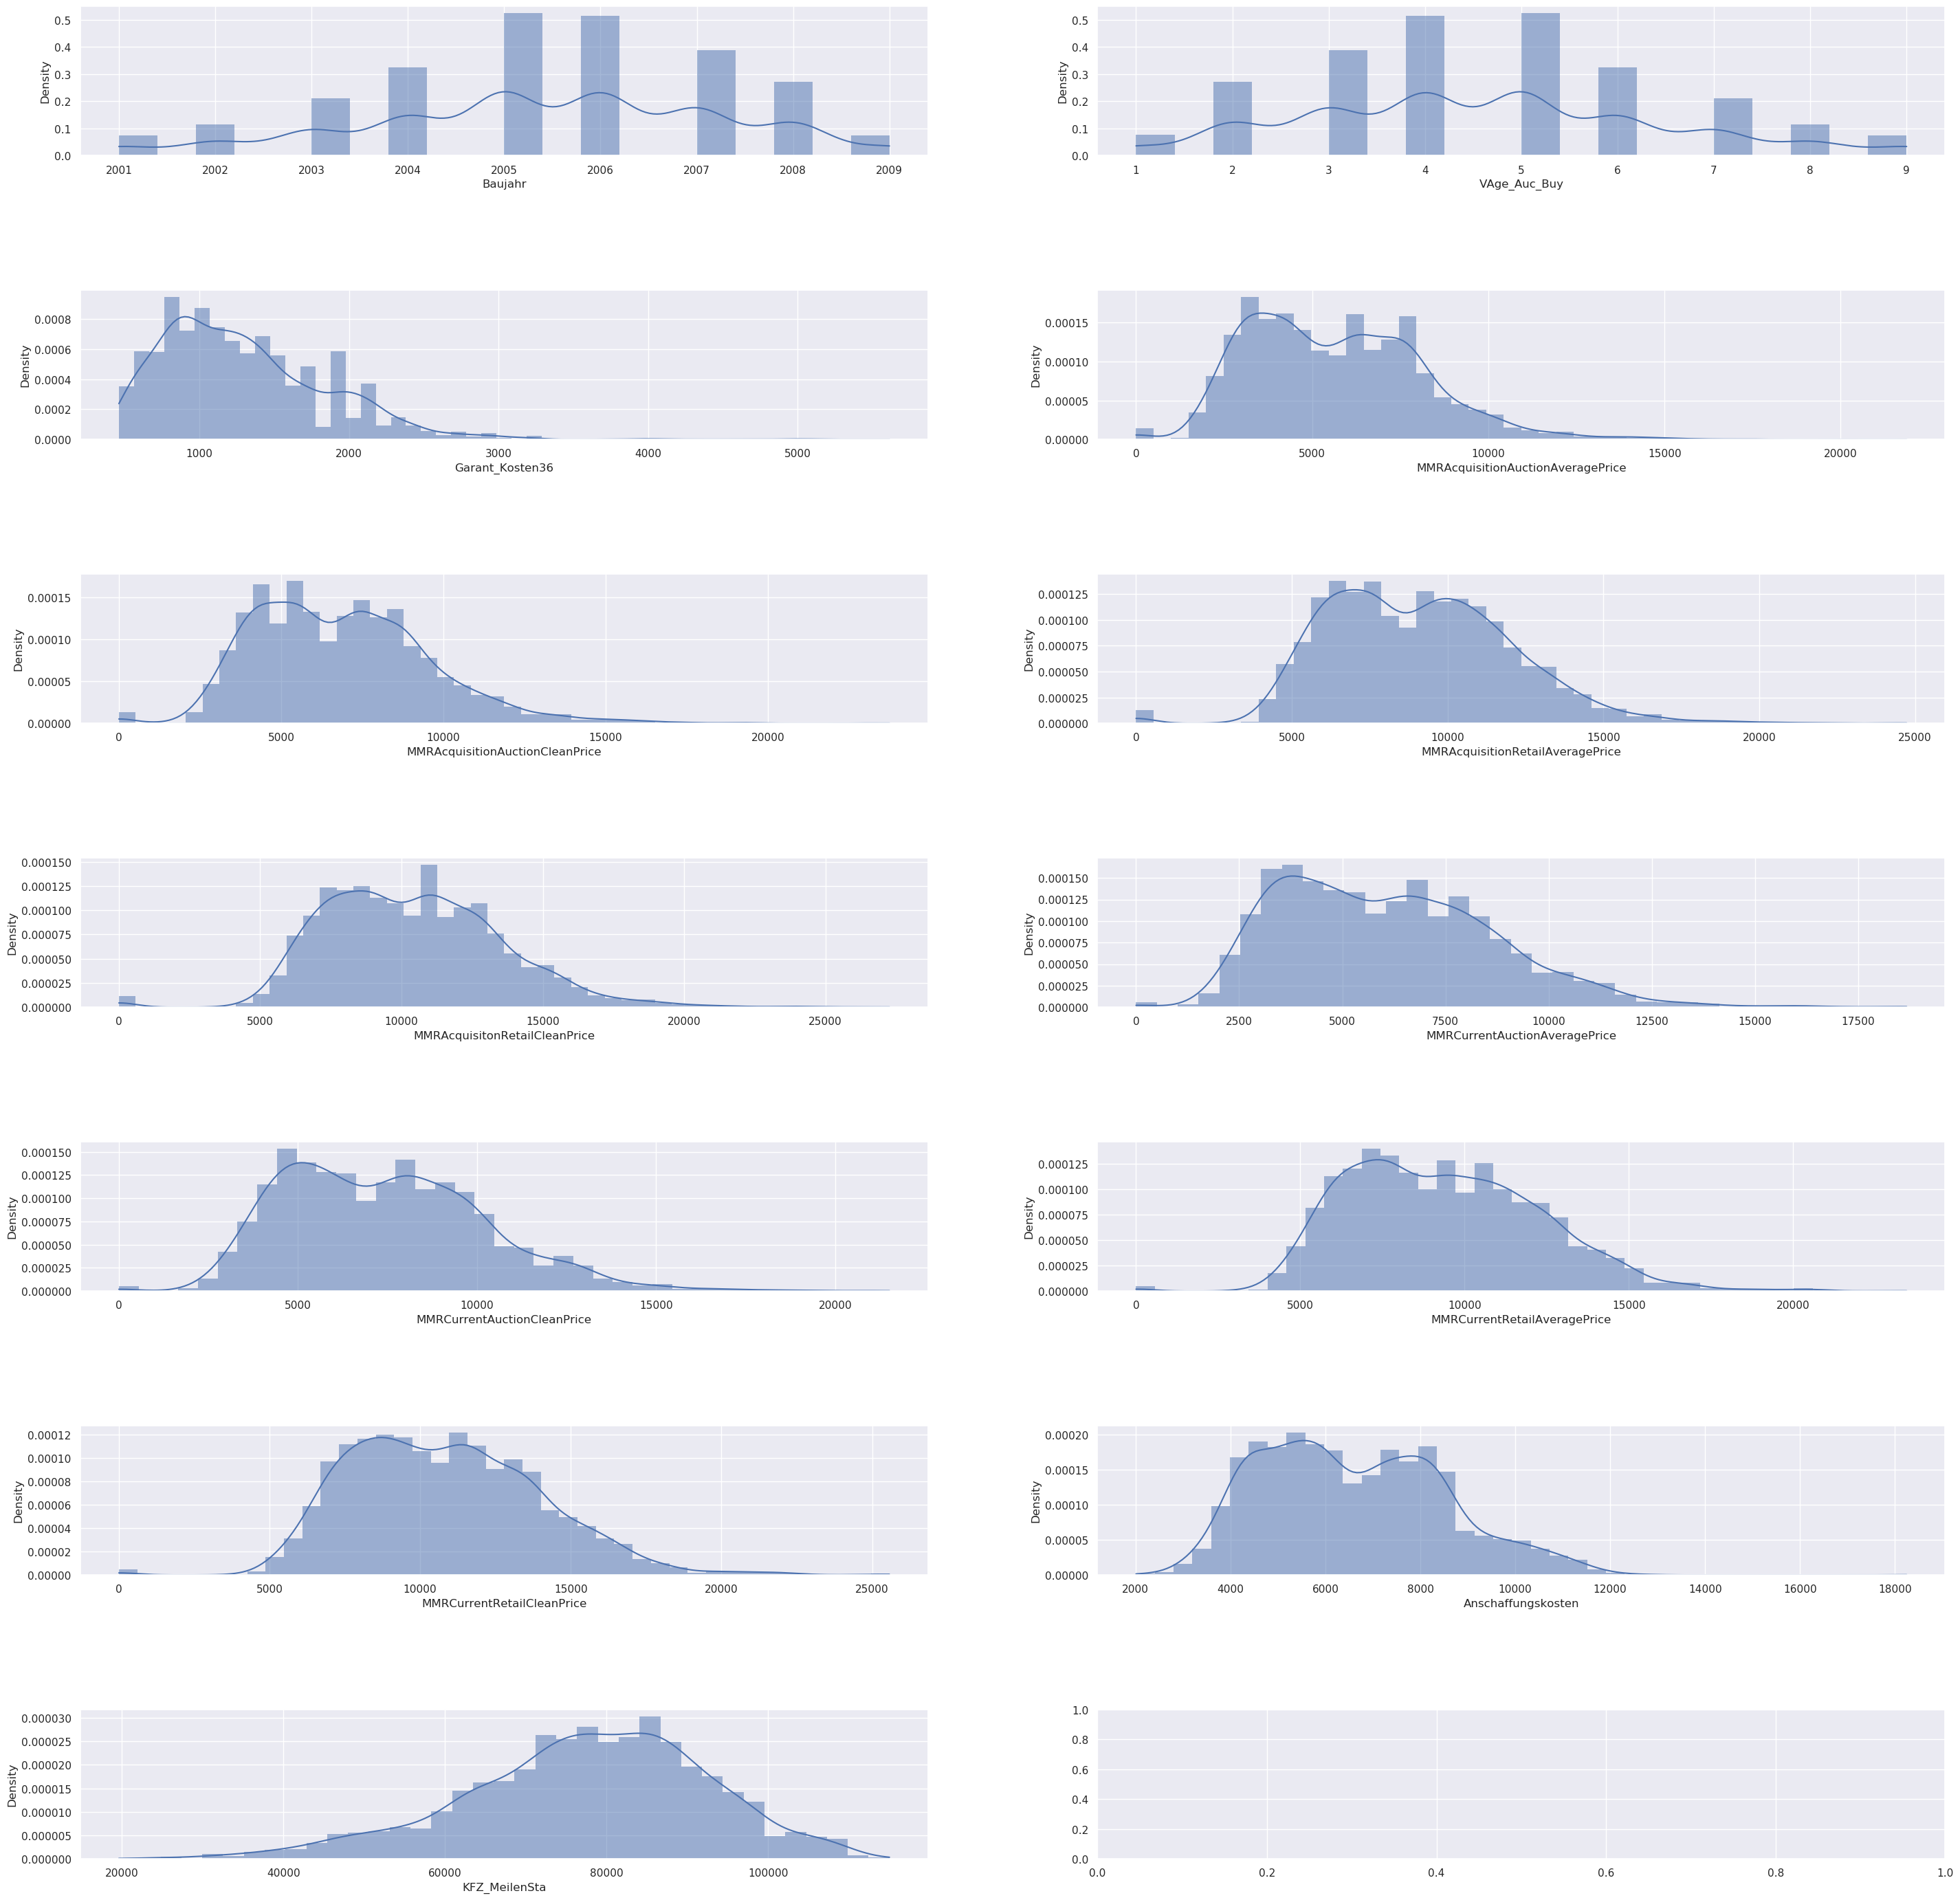

'\nObservations:\nOutliers are visible outside the whiksers. In the histograms, you can see the 0 sticking out.\n'

In [12]:
#1.6 Outlier Detection

num_cols = ['Baujahr', 'VAge_Auc_Buy', 'Garant_Kosten36', 'MMRAcquisitionAuctionAveragePrice', 
            'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
           'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
           'MMRCurrentRetailCleanPrice', 'Anschaffungskosten','KFZ_MeilenSta']



def vis_uni_out(num_cols,df_file):
    
    
    """Function to identify univariate outliers with boxplots and histograms."""
    
    #Boxplots
    fig, axs = plt.subplots(nrows=round(((len(num_cols)+1)/2)), ncols=2, figsize=(15, 35))
    #plt.subplots_adjust(hspace=0.2)

    for col, ax in zip(num_cols, axs.ravel()):
        sns.boxplot( y=df_file.loc[:,col],ax=ax)
    plt.show()
    
    


    #Histograms
    fig, axs = plt.subplots(nrows=round(((len(num_cols)+1)/2)), ncols=2, figsize=(35, 35))
    plt.subplots_adjust(hspace=0.9)

    for col, ax in zip(num_cols, axs.ravel()): 

        sns.histplot(df_file.loc[:,col].astype(float),label = col, kde=True, ax=ax, stat="density", linewidth=0)
    plt.show()
    
    
vis_uni_out(num_cols,df_start.dropna())


"""
Observations:
Outliers are visible outside the whiksers. In the histograms, you can see the 0 sticking out.
"""



RefId                                    0
Montagsauto                              0
Date_Buy_Auction                         0
Auktionsanbieter                         0
Baujahr                                  0
VAge_Auc_Buy                             0
KFZ_Herst                                0
KFZ_Model                                0
KFZ_Austatt                           2360
KFZ_SubModel                             8
Color                                  102
Getriebe                                 9
Felgen_ID                             3169
Felgen_Art                            3174
KFZ_MeilenSta                            0
Land_Herst                               5
Größenklasse                             5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

'\nObservation:\n\nPRIMEUNIT and Garant_vorhanden are kicked out of the dataset because there are too many NaNs.\nThe NaNs seem to be systematic in the MMR and Felgen F. as they occur in the same places.\n'

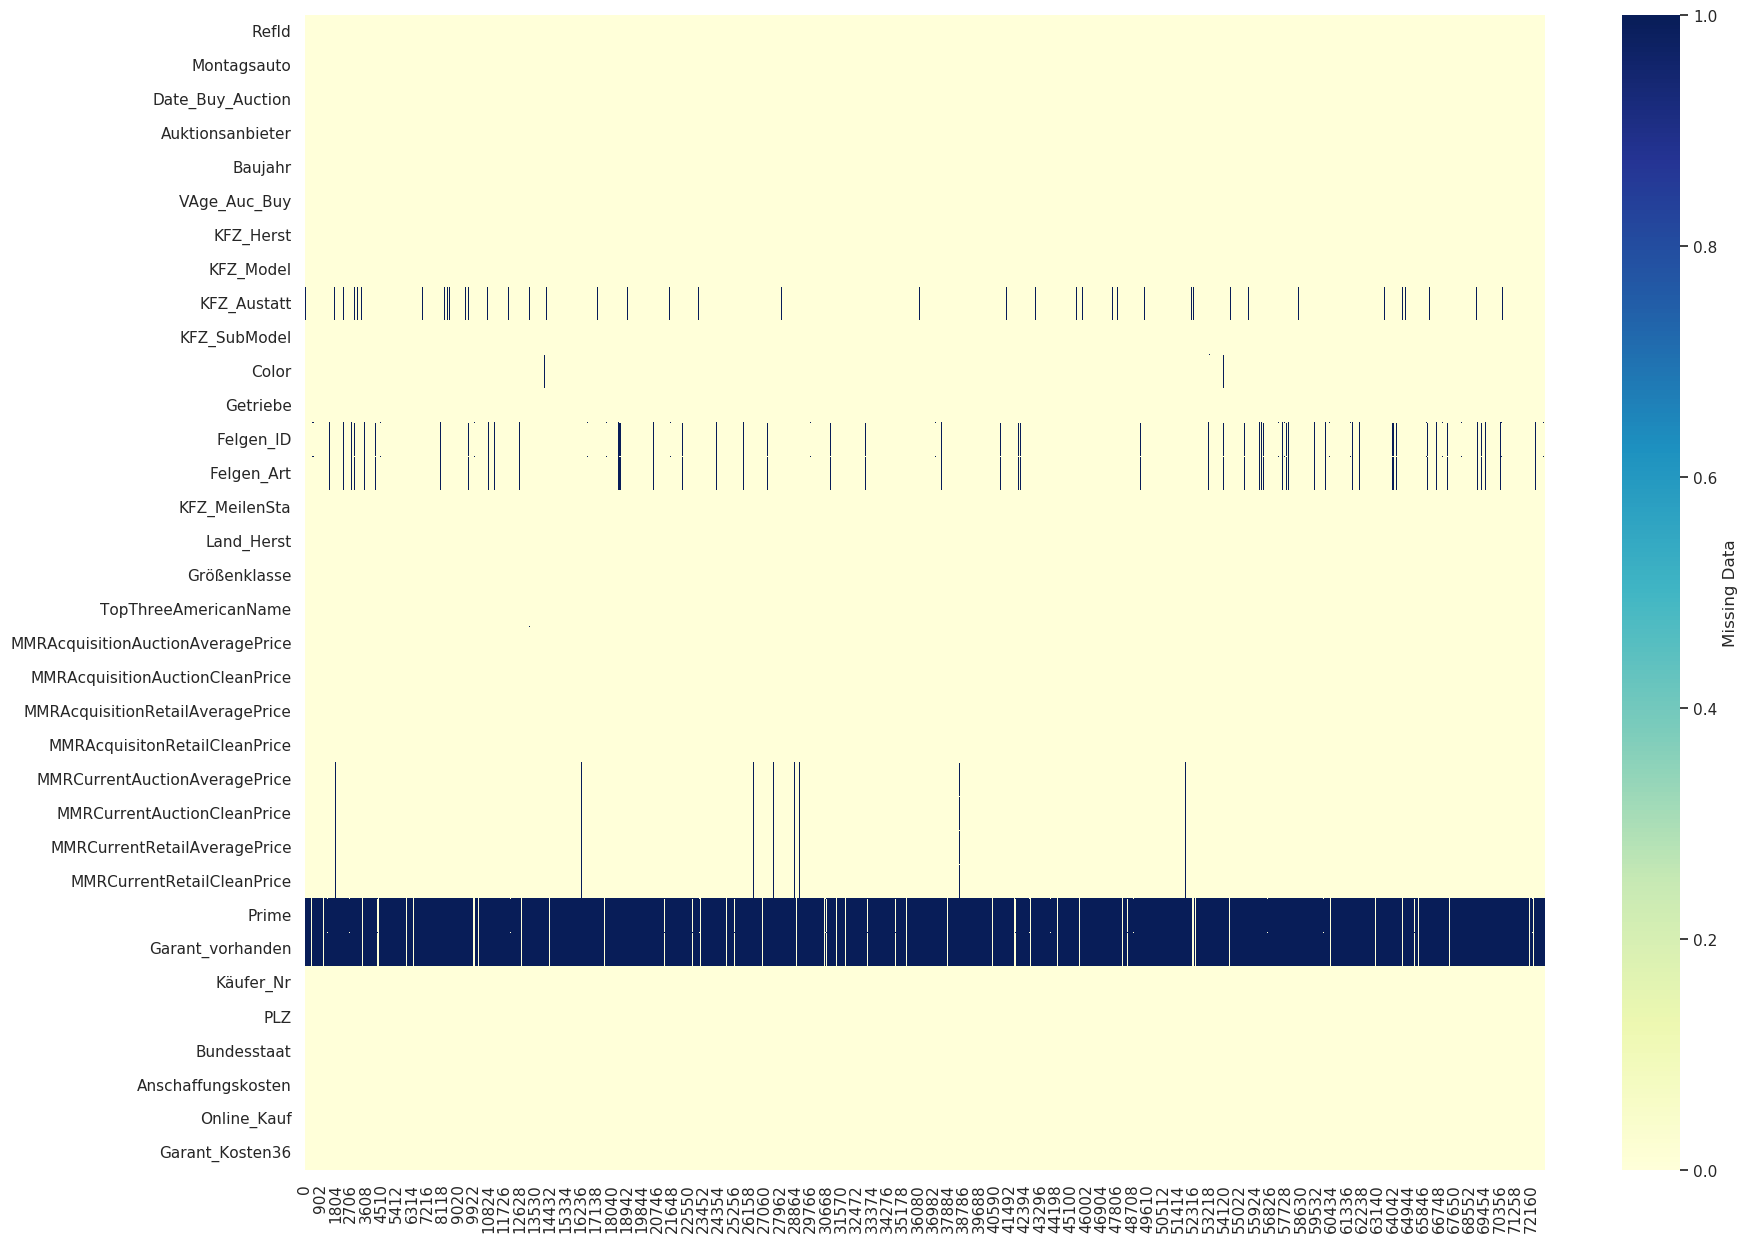

In [13]:
#1.7 Missing Data

#Show missings using a heat map
plt.figure(figsize=(20,15))
sns.heatmap(df_start.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

#Show missings using numbers
display(df_start.isna().sum())


"""
Observation:

PRIMEUNIT and Garant_vorhanden are kicked out of the dataset because there are too many NaNs.
The NaNs seem to be systematic in the MMR and Felgen F. as they occur in the same places.
"""

In [14]:
################################################################################################################
##############################################2. Train Test Split###############################################
################################################################################################################

In [15]:
# Perform train-test-split

#Import Data
df = pd.read_csv('training.csv')

df_train_1, df_test = train_test_split(df, test_size =0.1, random_state=42)

#Test Data for the finale pipeline
df_test.to_csv('df_test.csv', index=False)

#Train and validate dataset
df_train, df_val = train_test_split(df_train_1, test_size =0.1, random_state=42)


print('Daten importiert')
print(len(df_train))
print(len(df_test))

Daten importiert
59115
7299


In [16]:
#################################################################################################################
################################################3. Data Preparation##############################################
#################################################################################################################

In [17]:
#Rename, relabel, dtypes, Daten vars


def transform(df_file):

    
    """Function to rename features, change data types, preselect features and delete redundant features. """

    

    df_file.rename(columns={'PurchDate': 'Date_Buy_Auction','Auction': 'Auktionsanbieter',
                       'VehYear': 'Baujahr','VehicleAge': 'VAge_Auc_Buy','Make': 'KFZ_Herst','Model': 'KFZ_Model',
                       'Trim': 'KFZ_Austatt','SubModel': 'KFZ_SubModel','Transmission': 'Getriebe',
                       'WheelTypeID': 'Felgen_ID', 'WheelType': 'Felgen_Art', 'VehOdo': 'KFZ_MeilenSta',
                       'Nationality': 'Land_Herst','Size': 'Größenklasse','AUCGUART': 'Garant_vorhanden', 
                       'BYRNO': 'Käufer_Nr', 'VNZIP1': 'PLZ', 'VehBCost': 'Anschaffungskosten', 
                       'IsOnlineSale': 'Online_Kauf', 'WarrantyCost': 'Garant_Kosten36', 
                       'VNST': 'Bundesstaat'}, inplace=True)


    try:
        df_file.rename(columns={'IsBadBuy': 'Montagsauto'}, inplace=True)
    except:
        pass




    #Relabel

    df_file.loc[:, 'Getriebe'] = df_file.loc[:, 'Getriebe'].replace({'MANUAL':'Manual'})
    df_file.loc[:, 'Color'] = df_file.loc[:, 'Color'].replace({'NOT AVAIL':nan})

    #Delete
    #Redundant features are:
    
    #Felgen_art, KFZ_Model, KFZ_Austatt, Online_käufe

    """
    Felgen_art measures more or less the same as Felgen_ID, KFZ_Model and KFZ_Austatt are 
    not needed, because other car features provide enough information. Online_käufe
    has only one characteristic.
    """

    df_file = df_file[df_file.columns[~df_file.columns.isin(['VAge_Auc_Buy','Felgen_Art', 'KFZ_Model','KFZ_Austatt', 'Online_Kauf'])]]
    
    
    #Dtypes
    df_file.loc[:, 'Auktionsanbieter'] = df_file.loc[:, 'Auktionsanbieter'].astype('object')
    df_file.loc[:, 'Baujahr'] = df_file.loc[:, 'Baujahr'].astype('uint16')
    #df_file.loc[:, 'VAge_Auc_Buy'] = df_file.loc[:, 'VAge_Auc_Buy'].astype('uint16')
    df_file.loc[:, 'KFZ_Herst'] = df_file.loc[:, 'KFZ_Herst'].astype('object')
    #df_file.loc[:, 'KFZ_Model'] = df_file.loc[:, 'KFZ_Model'].astype('object')
    #df_file.loc[:, 'KFZ_Austatt'] = df_file.loc[:, 'KFZ_Austatt'].astype('object')

    df_file.loc[:, 'KFZ_MeilenSta'] = df_file.loc[:, 'KFZ_MeilenSta'].astype('uint16')

    #df_file.loc[:, 'Felgen_Art'] = df_file.loc[:, 'Felgen_Art'].astype('object')
    try:
        df_file.loc[:, 'Montagsauto'] = df_file.loc[:, 'Montagsauto'].astype('object')
    except:
        pass
    df_file.loc[:, 'KFZ_SubModel'] = df_file.loc[:, 'KFZ_SubModel'].astype('object')
    df_file.loc[:, 'Land_Herst'] = df_file.loc[:, 'Land_Herst'].astype('object')


    df_file.loc[:, 'Date_Buy_Auction'] = pd.to_datetime(df_file.loc[:, 'Date_Buy_Auction'])
    df_file.loc[:, 'Getriebe'] = df_file.loc[:, 'Getriebe'].astype('object')
    #df_file.loc[:, 'Garant_vorhanden'] = df_file.loc[:, 'Garant_vorhanden'].astype('object')
    #df_file.loc[:, 'PRIMEUNIT'] = df_file.loc[:, 'PRIMEUNIT'].astype('object')
    df_file.loc[:, 'TopThreeAmericanName'] = df_file.loc[:, 'TopThreeAmericanName'].astype('object')
    df_file.loc[:, 'Größenklasse'] = df_file.loc[:, 'Größenklasse'].astype('object')
    df_file.loc[:, 'Bundesstaat'] = df_file.loc[:, 'Bundesstaat'].astype('object')
    df_file.loc[:, 'Color'] = df_file.loc[:, 'Color'].astype('object')
    df_file.loc[:, 'Garant_Kosten36'] = df_file.loc[:, 'Garant_Kosten36'].astype('uint16')
    df_file.loc[:, 'Felgen_ID'] = df_file.loc[:, 'Felgen_ID'].astype('object')

    df_file.loc[:, 'MMRAcquisitionAuctionAveragePrice'] = df_file.loc[:, 'MMRAcquisitionAuctionAveragePrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'MMRAcquisitionAuctionCleanPrice'] = df_file.loc[:, 'MMRAcquisitionAuctionCleanPrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'MMRAcquisitionRetailAveragePrice'] = df_file.loc[:, 'MMRAcquisitionRetailAveragePrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'MMRAcquisitonRetailCleanPrice'] = df_file.loc[:, 'MMRAcquisitonRetailCleanPrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'MMRCurrentAuctionAveragePrice'] = df_file.loc[:, 'MMRCurrentAuctionAveragePrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'MMRCurrentAuctionCleanPrice'] = df_file.loc[:, 'MMRCurrentAuctionCleanPrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'MMRCurrentRetailAveragePrice'] = df_file.loc[:, 'MMRCurrentRetailAveragePrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'MMRCurrentRetailCleanPrice'] = df_file.loc[:, 'MMRCurrentRetailCleanPrice'].astype('uint16', errors='ignore')
    df_file.loc[:, 'Käufer_Nr'] = df_file.loc[:, 'Käufer_Nr'].astype('object')

    df_file.loc[:, 'PLZ'] = df_file.loc[:, 'PLZ'].astype('object')
    df_file.loc[:, 'Anschaffungskosten'] = df_file.loc[:, 'Anschaffungskosten'].astype('uint16', errors='ignore')
    # df_file.loc[:, 'Online_Kauf'] = df_file.loc[:, 'Online_Kauf'].astype('object')
    
    
    return df_file


In [18]:

def make_d_types(df_file):
    
    """ Function to correct the data types """
    
    df_file.loc[:, 'Auktionsanbieter'] = df_file.loc[:, 'Auktionsanbieter'].astype('object')
    df_file.loc[:, 'Baujahr'] = df_file.loc[:, 'Baujahr'].astype('uint16')
    # df_file.loc[:, 'VAge_Auc_Buy'] = df_file.loc[:, 'VAge_Auc_Buy'].astype('uint16')
    df_file.loc[:, 'KFZ_Herst'] = df_file.loc[:, 'KFZ_Herst'].astype('object')
    # df_file.loc[:, 'KFZ_Model'] = df_file.loc[:, 'KFZ_Model'].astype('object')
    # df_file.loc[:, 'KFZ_Austatt'] = df_file.loc[:, 'KFZ_Austatt'].astype('object')

    df_file.loc[:, 'KFZ_MeilenSta'] = df_file.loc[:, 'KFZ_MeilenSta'].astype('uint16')

    # df_file.loc[:, 'Felgen_Art'] = df_file.loc[:, 'Felgen_Art'].astype('object')
    try:
        df_file.loc[:, 'Montagsauto'] = df_file.loc[:, 'Montagsauto'].astype('object')
    except:
        pass
    df_file.loc[:, 'KFZ_SubModel'] = df_file.loc[:, 'KFZ_SubModel'].astype('object')
    df_file.loc[:, 'Land_Herst'] = df_file.loc[:, 'Land_Herst'].astype('object')

    df_file.loc[:, 'Date_Buy_Auction'] = pd.to_datetime(df_file.loc[:, 'Date_Buy_Auction'])
    df_file.loc[:, 'Getriebe'] = df_file.loc[:, 'Getriebe'].astype('object')
    # df_file.loc[:, 'Garant_vorhanden'] = df_file.loc[:, 'Garant_vorhanden'].astype('object')
    # df_file.loc[:, 'PRIMEUNIT'] = df_file.loc[:, 'PRIMEUNIT'].astype('object')
    df_file.loc[:, 'TopThreeAmericanName'] = df_file.loc[:, 'TopThreeAmericanName'].astype('object')
    df_file.loc[:, 'Größenklasse'] = df_file.loc[:, 'Größenklasse'].astype('object')
    df_file.loc[:, 'Bundesstaat'] = df_file.loc[:, 'Bundesstaat'].astype('object')
    df_file.loc[:, 'Color'] = df_file.loc[:, 'Color'].astype('object')
    df_file.loc[:, 'Garant_Kosten36'] = df_file.loc[:, 'Garant_Kosten36'].astype('uint16')
    df_file.loc[:, 'Felgen_ID'] = df_file.loc[:, 'Felgen_ID'].astype('object')

    df_file.loc[:, 'MMRAcquisitionAuctionAveragePrice'] = df_file.loc[:, 'MMRAcquisitionAuctionAveragePrice'].astype(
        'uint16', errors='ignore')
    
    df_file.loc[:, 'MMRAcquisitionAuctionCleanPrice'] = df_file.loc[:, 'MMRAcquisitionAuctionCleanPrice'].astype(
        'uint16', errors='ignore')
    
    df_file.loc[:, 'MMRAcquisitionRetailAveragePrice'] = df_file.loc[:, 'MMRAcquisitionRetailAveragePrice'].astype(
        'uint16', errors='ignore')
    
    df_file.loc[:, 'MMRAcquisitonRetailCleanPrice'] = df_file.loc[:, 'MMRAcquisitonRetailCleanPrice'].astype('uint16',
                                                                                                             errors='ignore')
    df_file.loc[:, 'MMRCurrentAuctionAveragePrice'] = df_file.loc[:, 'MMRCurrentAuctionAveragePrice'].astype('uint16',
                                                                                                             errors='ignore')
    df_file.loc[:, 'MMRCurrentAuctionCleanPrice'] = df_file.loc[:, 'MMRCurrentAuctionCleanPrice'].astype('uint16',
                                                                                                         errors='ignore')
    df_file.loc[:, 'MMRCurrentRetailAveragePrice'] = df_file.loc[:, 'MMRCurrentRetailAveragePrice'].astype('uint16',
                                                                                                           errors='ignore')
    df_file.loc[:, 'MMRCurrentRetailCleanPrice'] = df_file.loc[:, 'MMRCurrentRetailCleanPrice'].astype('uint16',
                                                                                                       errors='ignore')
    df_file.loc[:, 'Käufer_Nr'] = df_file.loc[:, 'Käufer_Nr'].astype('object')

    df_file.loc[:, 'PLZ'] = df_file.loc[:, 'PLZ'].astype('object')
    df_file.loc[:, 'Anschaffungskosten'] = df_file.loc[:, 'Anschaffungskosten'].astype('uint16', errors='ignore')
    # df_file.loc[:, 'Online_Kauf'] = df_file.loc[:, 'Online_Kauf'].astype('object')

    return df_file




In [19]:
################################################################################################################
##################################################4. Imputation#################################################
################################################################################################################

In [20]:
#4.1 Imput kat

def impute_data_kat(df_file):
    
    #Cat Features
    #Deletions of F. with too many missings

    df_file = df_file[df_file.columns[~df_file.columns.isin(['PRIMEUNIT', 'Garant_vorhanden'])]]

    #Felgen_ID and Rim_Type both measure the same.But Rims_ID has one more feature.
    #Therefore the choice for Felgen_ID. 
    
    df_file.loc[:, 'Felgen_ID'] = df_file.loc[:, 'Felgen_ID'].replace({0.0: 'D', 1: 'A', 2: 'B', 3: 'C'})
    df_file = df_file.fillna(value={'Felgen_ID': 'D'})
    df_file.loc[:, 'Felgen_ID'] = df_file.loc[:, 'Felgen_ID'].astype('object')

    # Color
    df_file = df_file.fillna(value={'Color': 'Other'})

    # KFZ_Submodel
    df_file = df_file.fillna(value={'KFZ_SubModel': 'Other'})

    #All other categorical variables have very few missing values, so the missing values can be called "Other". 
    rest_cols = ['TopThreeAmericanName', 'Größenklasse', 'Land_Herst', 'Getriebe']

    for col in rest_cols:
        df_file = df_file.fillna(value={col: 'Other'})

    df_file.loc[:, 'Auktionsanbieter'] = df_file.loc[:, 'Auktionsanbieter'].astype('object')
    df_file.loc[:, 'Color'] = df_file.loc[:, 'Color'].astype('object')
    df_file.loc[:, 'KFZ_Herst'] = df_file.loc[:, 'KFZ_Herst'].astype('object')
    df_file.loc[:, 'Land_Herst'] = df_file.loc[:, 'Land_Herst'].astype('object')
    df_file.loc[:, 'Größenklasse'] = df_file.loc[:, 'Größenklasse'].astype('object')
    df_file.loc[:, 'TopThreeAmericanName'] = df_file.loc[:, 'TopThreeAmericanName'].astype('object')
    df_file.loc[:, 'Bundesstaat'] = df_file.loc[:, 'Bundesstaat'].astype('object')

    return df_file




In [21]:
#4.2 Imput num

def impute_data_num(df_train_, df_val_test):
    
    """Imput missing values for numeric features with "MICE" """
    
    
    # Num F.
    num_c1 = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
              'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
              'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
              'MMRCurrentRetailCleanPrice']

    for col in num_c1:
        df_train_.loc[:, col] = df_train_.loc[:, col].replace(0, np.nan)
        df_val_test.loc[:, col] = df_val_test.loc[:, col].replace(0, np.nan)
    
    
    col_knn = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
               'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
               'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
               'MMRCurrentRetailCleanPrice', 'Anschaffungskosten']

    mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

    # keep cols
    keep_cols = df_train_[df_train_.columns[~df_train_.columns.isin(col_knn)]].columns.tolist()

    # keep cols
    col_dropper = ColumnTransformer([('drop_unused_cols', 'passthrough', keep_cols)], remainder='drop')

    # Mice transformer
    mice_transformer = ColumnTransformer([('Mice_Imp', mice_imputer, col_knn)], remainder=col_dropper)

    # fit encoder
    mice_transformer.fit(df_train_)

    col_names = col_knn + keep_cols

    # apply encoding and create DataFrames
    features_train_mice_train = pd.DataFrame(mice_transformer.transform(df_train_), columns=col_names)
    features_train_mice_val = pd.DataFrame(mice_transformer.transform(df_val_test), columns=col_names)

    # check
    col_dropper.fit(df_train_)
    if (df_train_[keep_cols].values == col_dropper.transform(df_train_)).all() == False:
        print('WARNING!')

    if (df_val_test[keep_cols].values == col_dropper.transform(df_val_test)).all() == False:
        print('WARNING!')

    return features_train_mice_train, features_train_mice_val






In [22]:
################################################################################################################
#############################################5. Deal with outliers##############################################
################################################################################################################

In [23]:


def sampling_data(df_file):
    
    """Delete univariate outliers using the median absolute distance"""
    
    num_cols = ['Garant_Kosten36', 'MMRAcquisitionAuctionAveragePrice',
                'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
                'MMRCurrentRetailCleanPrice', 'Anschaffungskosten', 'KFZ_MeilenSta']

    def mad_method(df_file, col):
        # Takes two parameters: dataframe & variable of interest as string
        var = df_file.loc[:, col]
        med = var.median()
        dist = (var - med).abs() / mad(list(var))

        mad_dev = dist <= int(3)

        return mad_dev

    #Outlier removal univariate
    for col in num_cols:
        outlier_mad = mad_method(df_file, col)
        df_file = df_file[outlier_mad]

    return df_file

In [24]:
#More functions


def dtype_separator(df_file):
    
    """ Devides the dataset in a numerical and a categorical dataset """

    df_file_num = df_file.copy()
    df_file_kat = df_file.copy()

    df_numerics_only1 = df_file_num.loc[:, df_file_num.columns.isin(df_file_num.select_dtypes(include=np.number))]
    col_num_1 = list(df_numerics_only1.columns)

    df_numerics_only = df_file_num[col_num_1]
    df_not_numerics_only = df_file_kat.loc[:, ~df_file_kat.columns.isin(df_numerics_only1.columns)]

    return df_numerics_only, df_not_numerics_only


def kat_maker(col, df_file):
    
    """ Function to automatically encode the labels of non-numeric features to numbers. """

    n = 0
    for word, num in zip(df_file.loc[:, str(col)].sort_values().unique(),
                         range(0, len(df_file.loc[:, str(col)].unique()))):

        if str(word) != 'nan':

            if int(n) == 0:
                dic1 = {str(word): num}
            if int(n) > 0:
                dic1.update({str(word): num})

        if str(word) == 'nan':
            dic1.update({str(word): str(word)})

        n = int(n) + 1

    return dic1



def kat_labels_to_numeric(df_file):

    df_file_num = df_file.copy()
    df_file_kat = df_file.copy()

    df_numerics_only1 = df_file_num.loc[:, df_file_num.columns.isin(df_file_num.select_dtypes(include=np.number))]
    col_num_1 = list(df_numerics_only1.columns)

    df_numerics_only = df_file_num[col_num_1]
    df_not_numerics_only = df_file_kat.loc[:, ~df_file_kat.columns.isin(df_numerics_only1.columns)]

    for col in df_not_numerics_only.columns.tolist():
        df_file.loc[:, col] = df_file.loc[:, col].replace(kat_maker(col, df_file))

    return df_file



def kat_labels_to_numeric_cols(df_file, collist):
    for col in collist:
        df_file.loc[:, col] = df_file.loc[:, col].replace(kat_maker(col, df_file))

    return df_file






In [25]:
#################################################################################################################
#############################################6. Feature Engineering##############################################
#################################################################################################################

In [26]:
def engineer_features(df_file):
    weekdayL = []
    yearL = []
    monthL = []
    year_monthL = []
    datumL = []
    weekendL = []

    # Create time features:weekday, month, year, year+month
    for date in df_file.loc[:, 'Date_Buy_Auction']:
        myDate = datetime.strptime(str(date), "%Y-%m-%d  %H:%M:%S")
        datum = myDate.date()
        weekno = myDate.weekday()
        year = str(myDate.year)
        month = str(myDate.month)
        weekdayL.append(weekno)
        yearL.append(year)
        monthL.append(month)
        datumL.append(datum)
        if len(str(month)) == 1:
            month_1 = str(0)+str(month)
        if len(str(month)) == 2:
            month_1 = str(month)
        year_monthL.append(str(year) + str(month_1))

    
    df_file.loc[:, 'Wochentag_Buy_A'] = weekdayL
    df_file.loc[:, 'Wochentag_Buy_A'] = df_file.loc[:, 'Wochentag_Buy_A'].astype('object')

    df_file.loc[:, 'Jahr_Buy_A'] = yearL
    df_file.loc[:, 'Jahr_Buy_A'] = df_file.loc[:, 'Jahr_Buy_A'].astype('object')

    df_file.loc[:, 'Monat_Buy_A'] = monthL
    df_file.loc[:, 'Monat_Buy_A'] = df_file.loc[:, 'Monat_Buy_A'].astype('object')

    df_file.loc[:, 'Jahr_Monat_Buy_A'] = year_monthL
    df_file.loc[:, 'Jahr_Monat_Buy_A'] = df_file.loc[:, 'Jahr_Monat_Buy_A'].astype('object')

    df_file.loc[:, 'Datum'] = datumL
    df_file.loc[:, 'Datum'] = df_file.loc[:, 'Datum'].astype('object')

    # Create Sub_Model Feature

    #Because there are too many categories in Submodel, a strategy 
    #had to be found to reduce the categories. The first three digits 
    #of the category give enough information about the category, so a 
    #new feature is created with the first three digits. Nan become the new category "Other".
    
    Sub_Model_clean_3L = []
    for mod in df_file.loc[:, 'KFZ_SubModel']:
        try:
            letterCheckreg = r"[A-Z]{3,}"
            match = re.search(letterCheckreg, mod)
            n = match.group()
            Sub_Model_clean_3L.append(n)
        except:
            Sub_Model_clean_3L.append('OTHER')

    df_file['Sub_Model_clean'] = Sub_Model_clean_3L

    #Factoring out inflation
    preis_cols = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                  'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                  'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                  'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'Anschaffungskosten']

    for col in preis_cols:
        print('Inflation entfernen: ' + col)

        real_PreisL = []
        n = 0
        for t, p, bau in zip(df_file.loc[:, 'Jahr_Buy_A'], df_file.loc[:, col], df_file.loc[:, "Baujahr"]):
            if int(t) == 2009:
                real_Preis = cpi.inflate(p, bau, to=2009)
            if int(t) == 2010:
                real_Preis = cpi.inflate(p, bau, to=2010)
            real_PreisL.append(real_Preis)

        df_file.loc[:, col] = real_PreisL
        df_file.loc[:, col] = df_file.loc[:, col].astype('float64')

        n = n + 1

    #Zip code and buyer numbers are too pronounced: Shorten

    #Shorten PLZ
    plz_shortL = []
    for plz in df_file.loc[:, 'PLZ']:
        plz = str(plz)
        letterCheckreg = r"[\d]{1}"
        match = re.search(letterCheckreg, plz)
        plz_short = match.group()
        plz_shortL.append(plz_short)

    df_file.loc[:, 'PLZ_short'] = plz_shortL

    #Shorten Käufer_Nr
    KfNr_shortL = []
    for kfnr in df_file.loc[:, 'Käufer_Nr']:
        kfnr = str(kfnr)

        if len(kfnr) == 3:
            letterCheckreg = r"[\d]{1}"
            match = re.search(letterCheckreg, kfnr)
            kfz_short = match.group()
            KfNr_shortL.append(kfz_short)

        if len(kfnr) > 3:
            letterCheckreg = r"[\d]{2}"
            match = re.search(letterCheckreg, kfnr)
            kfz_short = match.group()
            KfNr_shortL.append(kfz_short)

    df_file.loc[:, 'KfNr_short'] = KfNr_shortL

    return df_file




In [27]:
################################################################################################################
############################################7. Dimensionality Reduction#########################################
################################################################################################################

Inflation entfernen: MMRAcquisitionAuctionAveragePrice
Inflation entfernen: MMRAcquisitionAuctionCleanPrice
Inflation entfernen: MMRAcquisitionRetailAveragePrice
Inflation entfernen: MMRAcquisitonRetailCleanPrice
Inflation entfernen: MMRCurrentAuctionAveragePrice
Inflation entfernen: MMRCurrentAuctionCleanPrice
Inflation entfernen: MMRCurrentRetailAveragePrice
Inflation entfernen: MMRCurrentRetailCleanPrice
Inflation entfernen: Anschaffungskosten


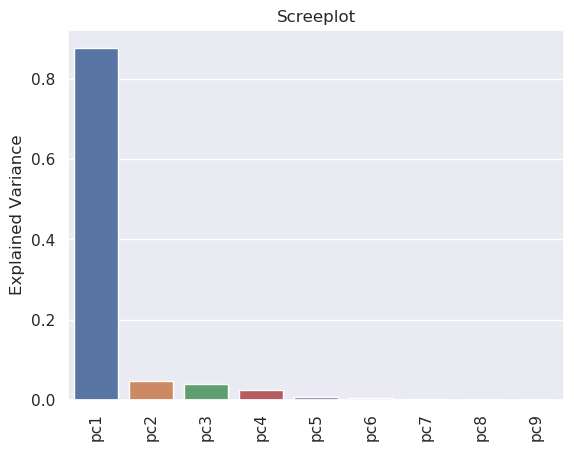

<Figure size 1500x500 with 0 Axes>

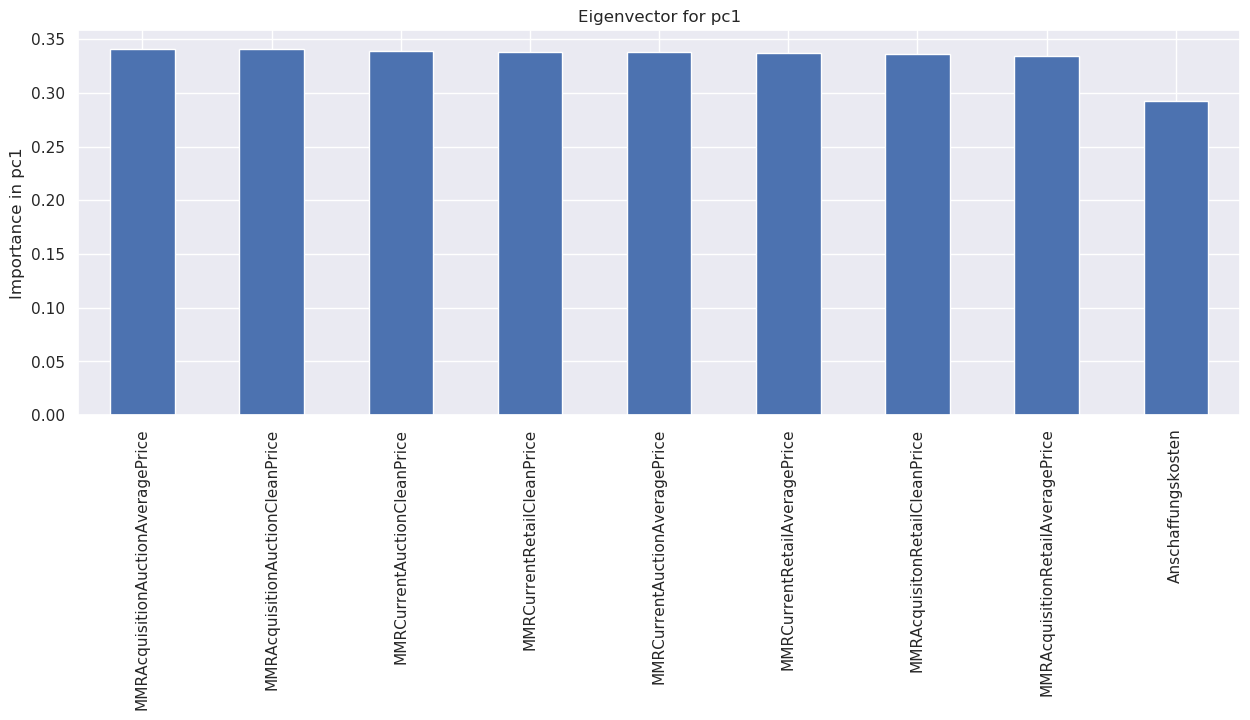

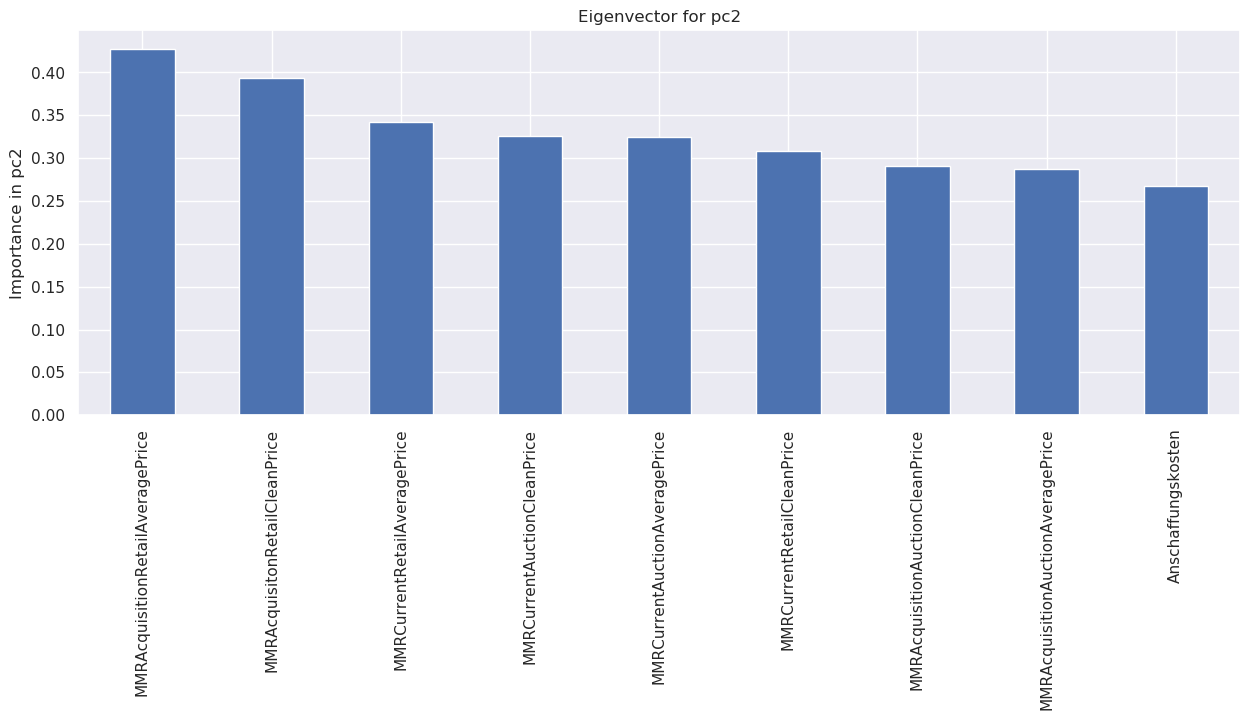

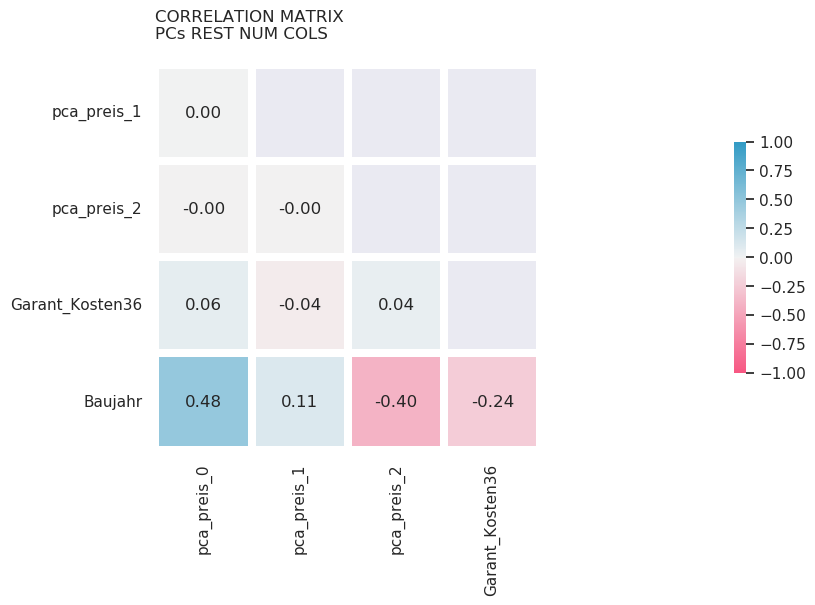

'\nus the price F. becomes 1-3 PCs.\nThe Corr matrix shows that there is only a medium strong correlation: \nYear of manufacture and pca_price_0\n'

In [28]:
"""
The price F. are highly correlated. VAge_Auc_Buy or year of manufacture (Baujahr) can be excluded.
Vehicle year/VAge_Auc_Buy are also highly correlated with price F.  Only warranty and vehicle mileage have 
with all F. the lowest correlation and among themselves a low correlation.
"""

col_corr = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'Anschaffungskosten']


from sklearn.preprocessing import StandardScaler


st_scaler = StandardScaler()


#Copy df
df_PCA = df_train.copy()

#Clean df_PCA
df_PCA = transform(df_PCA)
#Impute kat
df_PCA = impute_data_kat(df_PCA)
#df_impute_num BEIDE
df_PCA, df_X = impute_data_num(df_PCA, df_PCA)
#Dtypes
df_PCA = make_d_types(df_PCA)
#Outliers df_PCA
df_PCA = sampling_data(df_PCA)

#Engineer F. of df_PCA
df_PCA = engineer_features(df_PCA)


#Num Features of df_PCA
df_num_PCA_all = df_PCA.loc[:,col_corr]

#Scale Features
df_num_scaled = st_scaler.fit_transform(df_num_PCA_all)

#PCA Instanziieren
pca_num = PCA(random_state=42)

#Fit transform
pca_num.fit(df_num_scaled)
components = pca_num.transform(df_num_scaled)


#Visualisiere PCA Ergebnisse

#create names
pc_names = ['pc{}'.format(i+1) for i in range(pca_num.n_components_)]

#plot Sreeplot
ax = sns.barplot(x=pc_names, 
                 y=pca_num.explained_variance_ratio_)
#style plot
ax.set(title="Screeplot", 
       ylabel="Explained Variance")
plt.xticks(rotation=90);

plt.show()

#Eigenvektoren
eigenvectors = pd.DataFrame(pca_num.components_, index=pc_names)
eigenvectors.columns = df_num_PCA_all.columns.tolist()
plt.figure(figsize=(15,5))

plt.show()

#Barplot best F. on PC1
plt.figure(figsize=(15,5))
ax = abs(eigenvectors).loc['pc1',:].sort_values(ascending=False).head(10).plot.bar()
ax.set(title="Eigenvector for pc1", 
       ylabel="Importance in pc1")

plt.show()

#Barplot best F. on PC2
plt.figure(figsize=(15,5))
ax = abs(eigenvectors).loc['pc2',:].sort_values(ascending=False).head(10).plot.bar()
ax.set(title="Eigenvector for pc2", 
       ylabel="Importance in pc2")

plt.show()

#Korrelation Test


keep_cols = ['Garant_Kosten36', 'Baujahr']

#Pipe PCA
std_pca = Pipeline([('std', StandardScaler()), 
                    ('pca', PCA(n_components=3))])

#Drop unsed cols
col_dropper = ColumnTransformer([('drop_unused_cols', 'passthrough', keep_cols)],
                                remainder='drop')
#PCA --> corr num F. --> DR
corr_transformer = ColumnTransformer([('pipe_std_pca_corrcols', std_pca, col_corr)],
                                     remainder=col_dropper)

#PCA fit_transform
piped_out_arr = corr_transformer.fit_transform(df_PCA)
#Colnames for new DF: PCs + keep cols
col_names = ['pca_preis_0','pca_preis_1','pca_preis_2'] + keep_cols

#DF: PCs + keep cols + colnames
korr_test = pd.DataFrame(piped_out_arr, columns=col_names)


#Visualize the remaining Num F. with the PCs.
korr_test_df = korr_test.corr()

fig, ax = plt.subplots(figsize=(50, 5))

# mask
mask = np.triu(np.ones_like(korr_test_df, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = korr_test_df.iloc[1:,:-1].copy()


# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)



# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .6},square=True)

#Fontsize
sns.set(font_scale=0.5)
#Y axis limitation
ax.set_ylim(len(corr.columns),0)



# title
title = 'CORRELATION MATRIX\nPCs REST NUM COLS\n'
plt.title(title, loc='left', fontsize=12)

plt.show()



"""
us the price F. becomes 1-3 PCs.
The Corr matrix shows that there is only a medium strong correlation: 
Year of manufacture and pca_price_0
"""

In [29]:
################################################################################################################
############################################8. Feature Selection################################################
################################################################################################################

In [30]:

def feat_select(after_Fi):
    
        # Feature Selection

        columns_pca = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                        'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'Anschaffungskosten']

       
    
        columns_kat = [
        'Auktionsanbieter',
        'KFZ_Herst',
        'Color',
        'Getriebe',
        'Felgen_ID',
        'Land_Herst',
        'Größenklasse',
        'TopThreeAmericanName',
        'KfNr_short',
        'Bundesstaat',
        'Wochentag_Buy_A',
        'Jahr_Buy_A',
        'Monat_Buy_A',
        'Jahr_Monat_Buy_A',
        'PLZ_short',
        'Sub_Model_clean']

        
        
        columns_num = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                        'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 
                        'Anschaffungskosten', 'Baujahr', 'Garant_Kosten36', 'KFZ_MeilenSta']

        
        columns_num_2 = ['Baujahr', 'Garant_Kosten36', 'KFZ_MeilenSta']


        ##########################################################################################################


        columns_kat_ohe = [
        'Auktionsanbieter',
        'KFZ_Herst',
        'Color',
        'Getriebe',
        'Felgen_ID',
        'Land_Herst',
        'Größenklasse',
        'TopThreeAmericanName',
        'KfNr_short',
        'Bundesstaat',
        'PLZ_short',
        'Sub_Model_clean']

        columns_ord = [
        'Wochentag_Buy_A',
        'Jahr_Buy_A',
        'Monat_Buy_A',
        'Jahr_Monat_Buy_A']

        # Selected Features all
        cols_select = columns_kat + columns_num

        # Select Features after Feature Importance
        after_Fi_cols = []
        for c in cols_select:
            if c not in after_Fi:
                after_Fi_cols.append(c)

        after_Fi_kat_cols = []
        for c in columns_kat:
            if c not in after_Fi:
                after_Fi_kat_cols.append(c)

        after_Fi_kat_ohe_cols = []
        for c in columns_kat_ohe:
            if c not in after_Fi:
                after_Fi_kat_ohe_cols.append(c)

        after_Fi_pca_cols = []
        for c in columns_pca:
            if c not in after_Fi:
                after_Fi_pca_cols.append(c)

        after_Fi_num_cols = []
        for c in columns_num:
            if c not in after_Fi:
                after_Fi_num_cols.append(c)

        after_Fi_num_2_cols = []
        for c in columns_num_2:
            if c not in after_Fi:
                after_Fi_num_2_cols.append(c)


        after_Fi_ord_cols = []
        for c in columns_ord:
            if c not in after_Fi:
                after_Fi_ord_cols.append(c)


        # Train
        df_feature_select = df_train.copy()

        # Clean Train
        df_feature_select = transform(df_feature_select)

        # Impute kat
        df_feature_select = impute_data_kat(df_feature_select)

        #######################################################

        # Val
        df_feature_val_select = df_val.copy()
        # Clean Train
        df_feature_val_select = transform(df_feature_val_select)
        # Impute kat
        df_feature_val_select = impute_data_kat(df_feature_val_select)

        #######################################################

        # df_impute_num BOTH
        df_feature_select, df_feature_val_select = impute_data_num(df_feature_select, df_feature_val_select)
        # Dtypes
        df_feature_select = make_d_types(df_feature_select)
        df_feature_val_select = make_d_types(df_feature_val_select)

        # Outliers Train
        df_feature_select = sampling_data(df_feature_select)
        target_train = df_feature_select.loc[:, 'Montagsauto'].astype(int)

        # Engineer Train
        df_feature_select = engineer_features(df_feature_select)
        # Select
        features_train = df_feature_select.loc[:, after_Fi_cols]  ###################### Selection Features

        # Engineer Val
        df_feature_val_select = engineer_features(df_feature_val_select)
        # Select
        features_val = df_feature_val_select.loc[:, after_Fi_cols]  #################### Selection Features

        
        target_val = df_feature_val_select.loc[:, 'Montagsauto'].astype(int)



        cols_kat = features_train[features_train.columns[features_train.columns.isin(after_Fi_kat_cols)]].columns.tolist()
        cols_kat_ohe = features_train[features_train.columns[features_train.columns.isin(after_Fi_kat_ohe_cols)]].columns.tolist()
        cols_pca = features_train[features_train.columns[features_train.columns.isin(after_Fi_pca_cols)]].columns.tolist()
        cols_num_2 = features_train[features_train.columns[features_train.columns.isin(after_Fi_num_2_cols)]].columns.tolist()
        cols_ord = features_train[features_train.columns[features_train.columns.isin(after_Fi_ord_cols)]].columns.tolist()

        display(features_train.info())
        display('cols_kat', cols_kat)
        display('cols_kat_ohe', cols_kat_ohe)
        display('cols_kat_pca', cols_pca)
        display('cols_kat_num2', cols_num_2)
        display('cols_kat_ord', cols_ord)

        #Numerical Indexer for pipeline

        arr_kat = list(np.argwhere(features_train.columns.isin(after_Fi_kat_cols)).ravel())
        arr_kat_trans = [arr_kat[0], arr_kat[-1]]

        arr_pca = list(np.argwhere(features_train.columns.isin(after_Fi_pca_cols)).ravel())
        arr_pca_trans = [arr_pca[0], arr_pca[-1]]

        arr_num = list(np.argwhere(features_train.columns.isin(after_Fi_num_cols)).ravel())
        arr_num_trans = [arr_num[0], arr_num[-1]]

        #######################################################################


        arr_kat_ohe = list(np.argwhere(features_train.columns.isin(columns_kat_ohe)).ravel())
        arr_kat_ohe_trans = [arr_kat_ohe[0], arr_kat_ohe[-1]]

        arr_kat_ord = list(np.argwhere(features_train.columns.isin(columns_ord)).ravel())
        arr_kat_ord_trans = [arr_kat_ord[0], arr_kat_ord[-1]]

        print(features_train.info())
        print(arr_kat)
        print(arr_pca)

        print(arr_kat_ohe)
        print(arr_kat_ord)


        return arr_pca, arr_kat, cols_kat, cols_kat_ohe, cols_pca, cols_num_2, cols_ord, features_train, target_train, features_val, target_val
    

#XGBoost feature selection


after_Fi = ['Land_Herst', 'Color', 'Größenklasse', 'Jahr_Buy_A', 'Getriebe', 'Sub_Model_clean']

arr_pca, arr_kat, cols_kat, cols_kat_ohe, cols_pca, cols_num_2, cols_ord, features_train, target_train, features_val, target_val  = feat_select(after_Fi)

#Change arrangement
features_train = features_train.loc[:,cols_kat + cols_num_2 + cols_pca]
features_val = features_val.loc[:,cols_kat + cols_num_2 + cols_pca]


display(features_train)
display(features_val)

Inflation entfernen: MMRAcquisitionAuctionAveragePrice
Inflation entfernen: MMRAcquisitionAuctionCleanPrice
Inflation entfernen: MMRAcquisitionRetailAveragePrice
Inflation entfernen: MMRAcquisitonRetailCleanPrice
Inflation entfernen: MMRCurrentAuctionAveragePrice
Inflation entfernen: MMRCurrentAuctionCleanPrice
Inflation entfernen: MMRCurrentRetailAveragePrice
Inflation entfernen: MMRCurrentRetailCleanPrice
Inflation entfernen: Anschaffungskosten
Inflation entfernen: MMRAcquisitionAuctionAveragePrice
Inflation entfernen: MMRAcquisitionAuctionCleanPrice
Inflation entfernen: MMRAcquisitionRetailAveragePrice
Inflation entfernen: MMRAcquisitonRetailCleanPrice
Inflation entfernen: MMRCurrentAuctionAveragePrice
Inflation entfernen: MMRCurrentAuctionCleanPrice
Inflation entfernen: MMRCurrentRetailAveragePrice
Inflation entfernen: MMRCurrentRetailCleanPrice
Inflation entfernen: Anschaffungskosten
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57650 entries, 0 to 59114
Data columns (total 22

None

'cols_kat'

['Auktionsanbieter',
 'KFZ_Herst',
 'Felgen_ID',
 'TopThreeAmericanName',
 'KfNr_short',
 'Bundesstaat',
 'Wochentag_Buy_A',
 'Monat_Buy_A',
 'Jahr_Monat_Buy_A',
 'PLZ_short']

'cols_kat_ohe'

['Auktionsanbieter',
 'KFZ_Herst',
 'Felgen_ID',
 'TopThreeAmericanName',
 'KfNr_short',
 'Bundesstaat',
 'PLZ_short']

'cols_kat_pca'

['MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'Anschaffungskosten']

'cols_kat_num2'

['Baujahr', 'Garant_Kosten36', 'KFZ_MeilenSta']

'cols_kat_ord'

['Wochentag_Buy_A', 'Monat_Buy_A', 'Jahr_Monat_Buy_A']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57650 entries, 0 to 59114
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auktionsanbieter                   57650 non-null  object 
 1   KFZ_Herst                          57650 non-null  object 
 2   Felgen_ID                          57650 non-null  object 
 3   TopThreeAmericanName               57650 non-null  object 
 4   KfNr_short                         57650 non-null  object 
 5   Bundesstaat                        57650 non-null  object 
 6   Wochentag_Buy_A                    57650 non-null  object 
 7   Monat_Buy_A                        57650 non-null  object 
 8   Jahr_Monat_Buy_A                   57650 non-null  object 
 9   PLZ_short                          57650 non-null  object 
 10  MMRAcquisitionAuctionAveragePrice  57650 non-null  float64
 11  MMRAcquisitionAuctionCleanPrice    57650 non-null  flo

Auktionsanbieter KFZ_Herst Felgen_ID TopThreeAmericanName KfNr_short  \
0                ADESA      FORD         D                 FORD         20   
1              MANHEIM      FORD         A                 FORD         52   
2                ADESA      FORD         A                 FORD         19   
3              MANHEIM  CHRYSLER         A             CHRYSLER         23   
4                OTHER       KIA         B                OTHER         20   
...                ...       ...       ...                  ...        ...   
59109            ADESA     DODGE         B             CHRYSLER         20   
59110          MANHEIM  CHRYSLER         A             CHRYSLER         18   
59111            ADESA      FORD         A                 FORD         23   
59113            OTHER   PONTIAC         B                   GM         86   
59114          MANHEIM       KIA         B                OTHER         12   

      Bundesstaat Wochentag_Buy_A Monat_Buy_A Jahr_Monat_Buy_A PLZ_short  \
0              AZ               2           9           200909         8   
1              NC               1          11           201011         2   
2              TX               2           6           200906         7   
3              CA               3           9           201009         9   
4              CA               1           3           201003         9   
...           ...             ...         ...              ...       ...   
59109          AZ               2          12           201012         8   
59110          SC               3           3           201003         2   
59111          CA               1           8           200908         9   
59113          OK               3           8           200908         7   
59114          NV               3           5           201005         8   

       Baujahr  Garant_Kosten36  KFZ_MeilenSta  \
0         2005             1155           6484   
1         2008             1053          26425   
2         2005              920          12781   
3         2002             1930          30665   
4         2006              533          62962   
...        ...              ...            ...   
59109     2007             1503          21815   
59110     2001             1803          21399   
59111     2003             1283          22922   
59113     2004             1774          24754   
59114     2006              505          52421   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
0                                8232.16                          9916.16   
1                               12734.78                         14804.91   
2                                7370.93                          9449.29   
3                                3544.17                          4575.66   
4                                4930.06                          5633.11   
...                                  ...                              ...   
59109                            9318.88                         10829.08   
59110                            3612.51                          4744.04   
59111                            2677.05                          3859.33   
59113                            3702.44                          4971.03   
59114                            5549.83                          6798.03   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
0                               9440.51                       11258.52   
1                              16456.77                       18480.32   
2                               8510.08                       10754.31   
3                               7077.43                        8284.67   
4                               7904.53                        8971.01   
...                                 ...                            ...   
59109                          13295.25                       14976.88   
59110                           6494.8

Auktionsanbieter  KFZ_Herst Felgen_ID TopThreeAmericanName KfNr_short  \
0               ADESA  CHEVROLET         A                   GM         20   
1               ADESA  CHEVROLET         B                   GM         55   
2             MANHEIM    PONTIAC         A                   GM         34   
3               OTHER  CHEVROLET         A                   GM         34   
4               OTHER       FORD         B                 FORD         25   
...               ...        ...       ...                  ...        ...   
6564            ADESA       FORD         D                 FORD         18   
6565          MANHEIM  CHEVROLET         B                   GM         17   
6566          MANHEIM      DODGE         A             CHRYSLER         20   
6567          MANHEIM      DODGE         A             CHRYSLER         18   
6568          MANHEIM   CHRYSLER         B             CHRYSLER         52   

     Bundesstaat Wochentag_Buy_A Monat_Buy_A Jahr_Monat_Buy_A PLZ_short  \
0             AZ               2           2           200902         8   
1             FL               0          11           201011         3   
2             CO               2           3           200903         8   
3             CO               3          10           201010         8   
4             OK               3           2           201002         7   
...          ...             ...         ...              ...       ...   
6564          GA               1           3           200903         3   
6565          MO               2           3           200903         6   
6566          CA               2          12           200912         9   
6567          GA               3          10           200910         3   
6568          TX               1          10           201010         7   

      Baujahr  Garant_Kosten36  KFZ_MeilenSta  \
0        2004             1623           8740   
1        2007             1485          28667   
2        2006             1328          41144   
3        2004             1373          21028   
4        2007             1155           8391   
...       ...              ...            ...   
6564     2005              825           4307   
6565     2005             2152          18611   
6566     2008              834          47719   
6567     2005              723          24444   
6568     2005             1389          14321   

      MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
0                              12221.45                         14906.29   
1                               7016.76                          8033.73   
2                               7608.83                          9027.37   
3                               5079.12                          6492.04   
4                               6948.40                          8239.86   
...                                 ...                              ...   
6564                            4590.63                          5647.39   
6565                            5633.11                          7096.31   
6566                            7509.19                          8209.69   
6567                            3622.85                          4603.81   
6568                            4334.32                          5489.92   

      MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
0                             13767.17                       16666.65   
1                             11748.24                       12552.77   
2                              8749.62                       10282.03   
3                              9091.63                       10558.80   
4                             10810.15                       11538.96   
...                                ...                            ...   
6564                           5506.78                        6648.12   
6565                           6632.74                        8213.48   
6566    

In [31]:
#F1 Score List
results_models= []

#Sampler
smotesampler = SMOTE(random_state=42)
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

In [32]:
################################################################################################################
############################################9. Simple Baseline Model############################################
################################################################################################################

In [33]:
#Data preparation for resample


#Exclusion of the following F. as they have too many categories for OHE
Ausschluss = ['Date_Buy_Auction', 'KFZ_SubModel','PLZ','Käufer_Nr']

#df_train clean,sample
df_train_2 = df_train.copy()
df_train_2 = transform(df_train_2)
df_train_2 = impute_data_kat(df_train_2)

#df_val clean
df_val_2 = df_val.copy()
df_val_2 = transform(df_val_2)
df_val_2 = impute_data_kat(df_val_2)

#df_impute_num BOTH
df_train_2, df_val_2 = impute_data_num(df_train_2, df_val_2)

#Make d_types
df_train_2 = make_d_types(df_train_2)
df_val_2   = make_d_types(df_val_2)

#df_sampling train
df_train_2 = sampling_data(df_train_2)

#Ausschluss
df_train_2 = df_train_2[df_train_2.columns[~df_train_2.columns.isin(Ausschluss)]]
df_val_2   = df_val_2[df_val_2.columns[~df_val_2.columns.isin(Ausschluss)]]


#Feature train select und target
features_train_simple =  df_train_2[df_train_2.columns[~df_train_2.columns.isin(['Montagsauto'])]]
target_train_simple   =  df_train_2.loc[:,'Montagsauto'].astype(int)


#Feature val select und target
features_val_simple =  df_val_2[df_val_2.columns[~df_val_2.columns.isin(['Montagsauto'])]]
target_val_simple   =  df_val_2.loc[:,'Montagsauto'].astype(int)



"""
#####OHE
columns = ['Auktionsanbieter','Bundesstaat', 'Land_Herst','Felgen_ID', 
           'Getriebe','TopThreeAmericanName','Color', 'Größenklasse', 'KFZ_Herst']

# set up pipeline
ohe = OneHotEncoder(sparse=False)
encoder = ColumnTransformer([('OHE',ohe, columns)], remainder='passthrough')

# fit encoder
encoder.fit(features_train)


# restore column names for final DataFrames
ohe_names = encoder.named_transformers_['OHE'].get_feature_names(columns)
remaining_names = encoder._df_columns[encoder._remainder[2]]

#apply encoding and create DataFrames
features_train_ohe = pd.DataFrame(encoder.transform(features_train), columns = list(ohe_names) + list(remaining_names))
features_val_ohe = pd.DataFrame(encoder.transform(features_val), columns = list(ohe_names) + list(remaining_names))

"""

#Kat features in numiceral features

features_train_num = kat_labels_to_numeric(features_train_simple)
features_val_num = kat_labels_to_numeric(features_val_simple)


"""
for col in features_train.columns.tolist():
    features_train.loc[:,col] = features_train.loc[:,col].astype('float64')
    features_val.loc[:,col] = features_val.loc[:,col].astype('float64')
"""


"\nfor col in features_train.columns.tolist():\n    features_train.loc[:,col] = features_train.loc[:,col].astype('float64')\n    features_val.loc[:,col] = features_val.loc[:,col].astype('float64')\n"

In [34]:
simple_tree= DecisionTreeClassifier(random_state=42)

In [35]:
score_results = pd.DataFrame()
# fit pipeline on cleaned (and filtered) training set
simple_tree.fit(features_train_num, target_train_simple)

DecisionTreeClassifier(random_state=42)

In [36]:
# predict and evaluate on test set tree
simple_tree_pred = simple_tree.predict(features_val_num)

#Metrics tree
recall = recall_score(target_val_simple, simple_tree_pred)
precision = precision_score(target_val_simple, simple_tree_pred)
f1 = f1_score(target_val_simple,simple_tree_pred)

#Metrics to df
scores = {'Modell': 'Simple Tree',
          'precision': precision,
          'recall': recall,
         'f1': f1,}
results_models.append(scores)
    
#show results
score_results = score_results.append(results_models, ignore_index=True)
display(pd.DataFrame(score_results))

Modell  precision  recall   f1
0  Simple Tree       0.28    0.33 0.30

In [37]:
#################################################################################################################
##########################################10. Train model XGBoost Bayesian Opt###################################
#################################################################################################################

In [38]:
from sklearn.preprocessing import PolynomialFeatures
#Main model 


#Instantiate model
model_xgb = XGBClassifier(random_state=42, seed = 0)

#Categorical Transformer
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

#Ohe
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')



#Sampler
samplers = [('oversampling', oversampler),
            ('undersampling', undersampler),
            ('class_weights', 'passthrough'),
            ('SMOTE', smotesampler)] 

#Kfold
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)


#########################################################################################


#Hyperparameter XGBoost
search_space  = { 

    'max_depth': hp.choice('model__max_depth', [7]),  # [3]
    # 3 [x for x in range(3,(32),5)] #8
    'max_leaves': hp.choice('max_leaves', [49]),  # 48 #68 [x for x in range(18,(50),5)] #65

    'booster': hp.choice('booster', ['gbtree']),
    'objective': hp.choice('objective', ['binary:logistic']),
    'tree_method': hp.choice('tree_method', ['hist']),

    'n_estimators': hp.choice('model__n_estimators', [1600]),  # 500 650 [x for x in range(100,(600),20)]
    'learning_rate': hp.choice('model__learning_rate', [0.1]),  # [0.10434482758620689]

    'subsample': hp.choice('model__subsample', [1]),  # [0.89]
    'scale_pos_weight': hp.choice('model__scale_pos_weight',  [4]),  # [3.55]
    'colsample_bytree': hp.choice('model__colsample_bytree', [0.9]),  # [0.85]
    'colsample_bylevel': hp.choice('model__colsample_bylevel', [0.8]),  # [0.925]
    'colsample_bynode': hp.choice('model__colsample_bynode', [0.8]),  # [0.88888]

    'gamma': hp.choice('model__gamma', [1]),  # [0.555]
    'max_delta_step': hp.choice('model__max_delta_step', [0.7]),  # [1.12]
    'reg_alpha': hp.choice('model__reg_alpha', [14.737105263157895]),  # [14.737105263157895]
    'reg_lambda': hp.choice('model__reg_lambda',[37.525]),  # [7.777799]

    #PCA
    'n_components': hp.choice('transformer__pca_trans__pca__n_components',[3]),

    
    } 


# Objective function
def objective(params):


        model_xgb = XGBClassifier(random_state=42, seed = 0, n_jobs=-1,grow_policy='lossguide' ,

        booster=params['booster'],
        objective=params['objective'],
        tree_method=params['tree_method'],
        scale_pos_weight=params['scale_pos_weight'],
                                  
        max_leaves=params['max_leaves'],
        max_depth=params['max_depth'],
                                  
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
                                  
        subsample=params['subsample'],         
        colsample_bytree=params['colsample_bytree'],
        colsample_bylevel=params['colsample_bylevel'],
        colsample_bynode=params['colsample_bynode'],
                           

        gamma=params['gamma'],
        max_delta_step=params['max_delta_step'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda']

        )


        #PCA
        pca = PCA(n_components = params['n_components'], random_state=42)
        #PCA Pipe
        pca_pipe = Pipeline([('std', StandardScaler()),('pca', pca)])
        

        
        """
        transformer = ColumnTransformer([('cat', categorical_transformer, cols_kat ),
        ('pca_trans', pca_pipe, cols_pca)], remainder='passthrough')

        pipeline_main_xgb = Pipeline_imb(steps=[('oversampling', oversampler), ('transformer',transformer),
        ('model', model_xgb)]) 
        """
       
        transformer = ColumnTransformer([('kat', categorical_transformer, cols_kat ),
        ('pass', 'passthrough', cols_num_2), ('pca_trans', pca_pipe, cols_pca)])


        pipeline_main_xgb = Pipeline_imb(steps=[ ('transformer',transformer),
        ('model', model_xgb)]) 


        
        #GridSearch XGBoost
        score = cross_val_score(estimator=pipeline_main_xgb, 
                                X=features_train, 
                                y=target_train, 
                                cv=kfold, 
                                scoring='f1').mean()

        # Loss is negative score
        loss = - score

       
        # Dictionary with information for evaluation
        return {'loss': loss, 'params': params, 'status': STATUS_OK}



# Optimize
best = fmin(fn = objective, space = search_space, algo = tpe.suggest, max_evals = 5, trials = Trials()) 

# Print the values of the best parameters
print(space_eval(search_space, best))
best_choice_xgboost = space_eval(search_space, best) 
pickle.dump(best_choice_xgboost, open('best_choice_xgboost.p', 'wb'))


100%|██████████| 5/5 [00:12<00:00,  2.59s/trial, best loss: -0.41753951715930465]
{'booster': 'gbtree', 'colsample_bylevel': 0.8, 'colsample_bynode': 0.8, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.1, 'max_delta_step': 0.7, 'max_depth': 7, 'max_leaves': 49, 'n_components': 3, 'n_estimators': 1600, 'objective': 'binary:logistic', 'reg_alpha': 14.737105263157895, 'reg_lambda': 37.525, 'scale_pos_weight': 4, 'subsample': 1, 'tree_method': 'hist'}


In [39]:
best_choice_xgboost = pickle.load(open('best_choice_xgboost.p', 'rb'))

objective=best_choice_xgboost['objective'] 
tree_method=best_choice_xgboost['tree_method'] 
booster=best_choice_xgboost['booster'] 

max_leaves=best_choice_xgboost['max_leaves'] 
max_depth=best_choice_xgboost['max_depth'] 

n_estimators=best_choice_xgboost['n_estimators'] 
learning_rate=best_choice_xgboost['learning_rate'] 

subsample=best_choice_xgboost['subsample'] 
colsample_bytree=best_choice_xgboost['colsample_bytree'] 
colsample_bylevel=best_choice_xgboost['colsample_bylevel'] 
colsample_bynode=best_choice_xgboost['colsample_bynode'] 

gamma=best_choice_xgboost['gamma'] 

scale_pos_weight=best_choice_xgboost['scale_pos_weight'] 
max_delta_step=best_choice_xgboost['max_delta_step'] 
reg_alpha=best_choice_xgboost['reg_alpha'] 
reg_lambda=best_choice_xgboost['reg_lambda']

#PCA
n_components=best_choice_xgboost['n_components']


In [40]:
################################################################################################################
#############################################11. Train model XGBoost ###########################################
################################################################################################################

In [41]:
"""

In the course of creating the notebook, the following findings were made:

1. there was a feature selection that was made based on the feature importance and slightly 
improved the result in the training, but not in the test data set.

2. ohe compared to the numbering of the categorical features made little difference. It was 
decided to use numerization.

3. the use of OHE on trees is controversial. In and of itself, no OHE is necessary. 

4. the number of principal components should be 3 for the best results. 

5. other models have been tried. XGBoost performed best and fastest. 

6. samplers did not improve the output. In-model balancing was more effective.
"""




#Instantiate model
model_xgb = XGBClassifier(random_state=42, seed = 0, n_jobs=-1, eval_metric = 'auc',
                          grow_policy='lossguide')


#Categorical Transformer
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

#Ohe
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')


#Sampler
samplers = [('oversampling', oversampler),
            ('undersampling', undersampler),
            ('class_weights', 'passthrough'),
            ('SMOTE', smotesampler)] 

#Kfold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

#PCA
pca = PCA(random_state=42, n_components = 3)

#PCA Pipe
pca_pipe = Pipeline([('std', StandardScaler()),('pca', pca)])

  
#Transformer cat to num
transformer = ColumnTransformer([('ord', categorical_transformer, cols_kat ),
('pass', 'passthrough', cols_num_2), ('pca_trans', pca_pipe, cols_pca)])

#Transformer cat to ohe
"""
transformer = ColumnTransformer([('ohe', ohe, cols_kat_ohe ), ('ord', categorical_transformer, cols_ord ),
('pca_trans', pca_pipe, cols_pca)], remainder='passthrough')

"""

pipeline_main_xgb = Pipeline_imb(steps=[('transformer',transformer),
('model', model_xgb)]) 


#########################################################################################



#Hyperparameter XGBoost
search_space  = { 
    
                        'model__tree_method' : [tree_method],
                        'model__objective' : [objective], 
                        'model__booster' : [booster], 

                        'model__max_depth' : [max_depth],
                        'model__max_leaves' : [max_leaves],

                        'model__n_estimators' : [n_estimators],
                        'model__learning_rate' : [learning_rate],            

                        'model__subsample' : [subsample],
                        'model__colsample_bytree' : [colsample_bytree],
                        'model__colsample_bylevel' : [colsample_bylevel],
                        'model__colsample_bynode' : [colsample_bynode],

                        'model__gamma' : [gamma],
                        'model__scale_pos_weight' : [scale_pos_weight],
                        'model__max_delta_step' : [max_delta_step],

                        'model__reg_alpha' : [reg_alpha],
                        'model__reg_lambda' : [reg_lambda],


                        'transformer__pca_trans__pca__n_components' : [3]


                }



#GridSearch XGBoost
grid_main_xgb = GridSearchCV(estimator=pipeline_main_xgb,
            param_grid=search_space,
            cv=kfold,
            scoring='f1',
            refit = 'f1',
            n_jobs = -1)


#GS XGBoost fit
grid_main_xgb.fit(features_train, target_train)

#GS XGBoost predict
main_pred = grid_main_xgb.predict(features_val)

#Best hypeterparamter XGBoost
print(grid_main_xgb.best_estimator_)

#Best score by CV
print(f'The best score is {grid_main_xgb.best_score_:.4f}')

###########################################

f1 = f1_score(target_val, main_pred)
recall =  recall_score(target_val, main_pred)
precision =  precision_score(target_val, main_pred)



scores = {  'Modell': 'XGBoost',
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'Estimator': str(grid_main_xgb.best_estimator_)}



#show results
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
name_csv = str('main_results' + str(dt_string) + '.csv')

#Results to dataframe
results_models.append(scores)
scores_df = pd.DataFrame(results_models)
scores_df.to_csv(name_csv)

#Save model
pickle.dump(grid_main_xgb, open('grid_main_xgb.p', 'wb'))

display(scores_df)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Auktionsanbieter',
                                                   'KFZ_Herst', 'Felgen_ID',
                                                   'TopThreeAmericanName',
                                                   'KfNr_short', 'Bundesstaat',
                                                   'Wochentag_Buy_A',
                                                   'Monat_Buy_A',
                                                   'Jahr_Monat_Buy_A',
                                                   'PLZ_short']),
                                                 ('pass', 'passthrough',
                                                  ['Baujahr', 'Garant_Kosten3

Modell  precision  recall   f1  \
0  Simple Tree       0.28    0.33 0.30   
1      XGBoost       0.47    0.41 0.44   

                                           Estimator  
0                                                NaN  
1  Pipeline(steps=[('transformer',\n             ...

In [42]:
#################################################################################################################
##############################################12.Feature Importance #############################################
#################################################################################################################

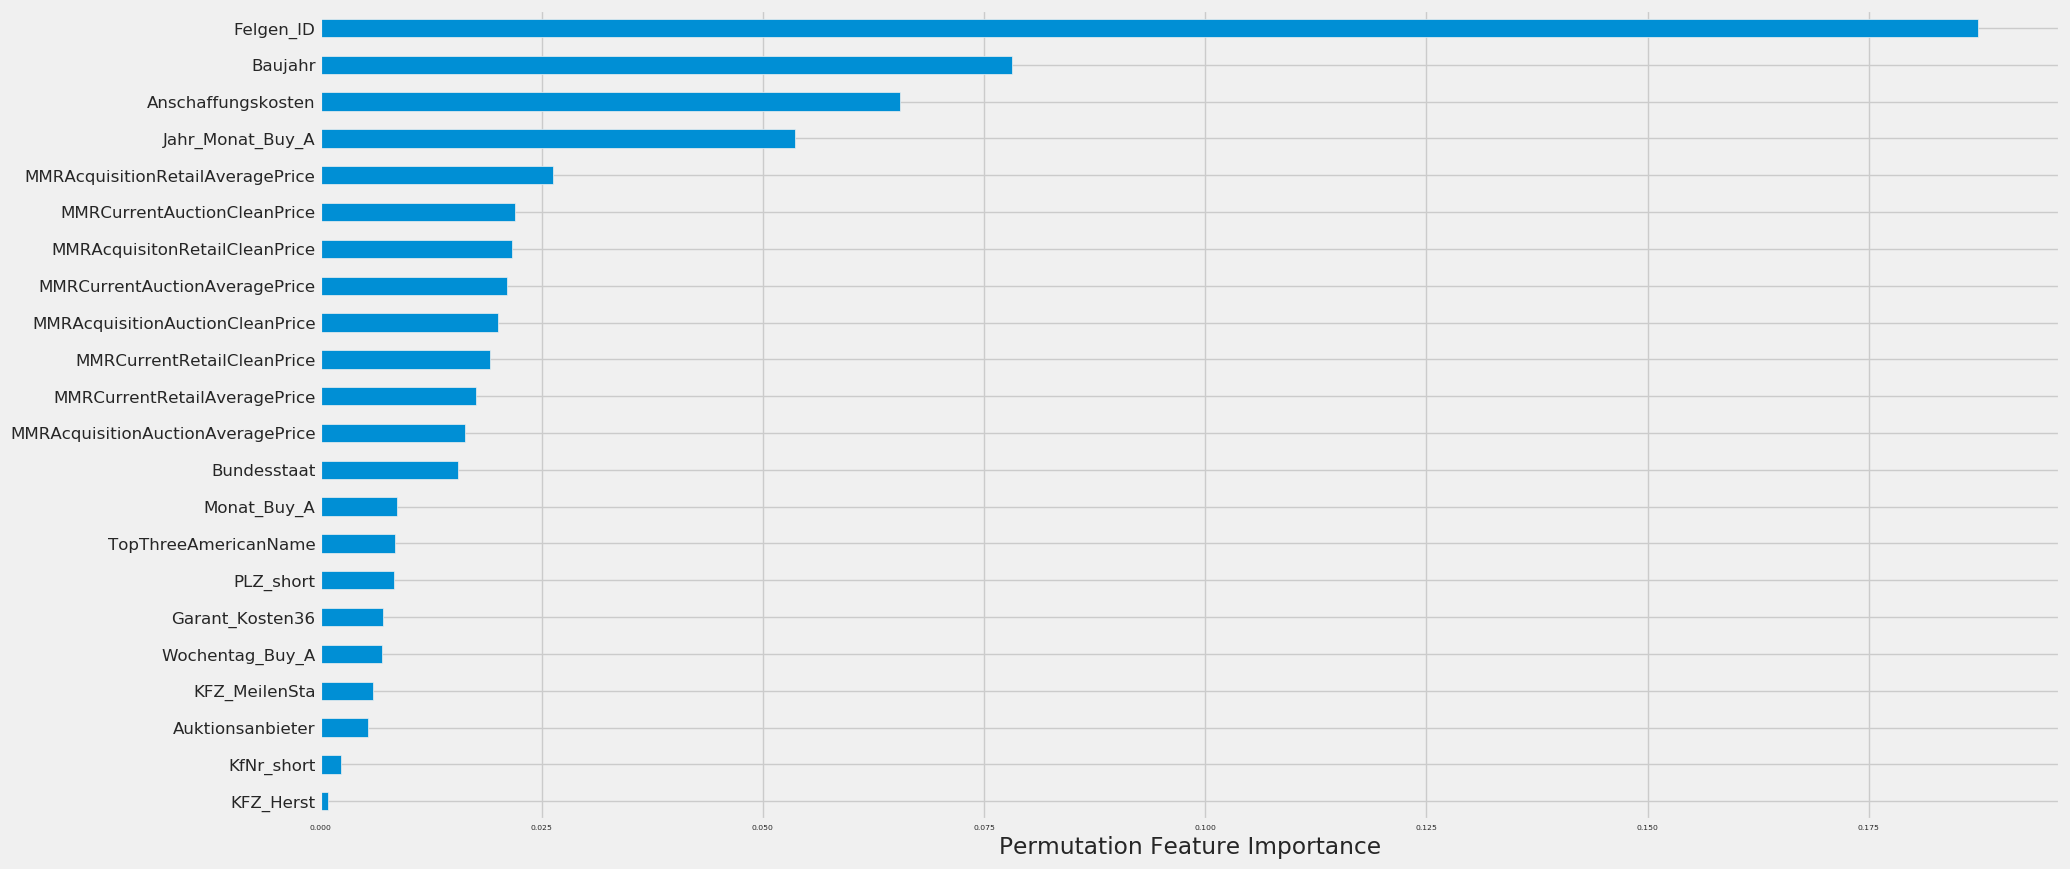

"\nAfter the exclusion of the features 'Color', 'Jahr_Buy_A', 'Land_Herst', 'Bundesstaat', 'Größenklasse', \n'KFZ_Herst', 'Getriebe', 'Wochentag_Buy_A','Monat_Buy_A' an increase of the F1 score by \n0.01 could be achieved. Further exclusions could not achieve any improvement.\n"

<Figure size 640x480 with 0 Axes>

In [43]:
#Load model
grid_main_xgb = pickle.load(open('grid_main_xgb.p', 'rb'))

#Feature Importances
def permutation_importances(model, X_train, y_train, metric):
    y_pred = model.predict(X_train)
    baseline = metric(y_train, y_pred)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        np.random.seed(42)
        X_train[col] = np.random.permutation(X_train[col])
        y_pred = model.predict(X_train)
        m = metric(y_train, y_pred)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)



permutation_importancesA = permutation_importances(grid_main_xgb, features_val, target_val, f1_score)


plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()




# Convert feature importance array into a series and visualize
perm_importance = pd.Series(permutation_importancesA, index=features_val.columns).sort_values()
perm_importance.plot(kind='barh', ax=ax,figsize=(20,10))

plt.yticks(fontsize=12,)
ax.set_xlabel('Permutation Feature Importance')
plt.show()
plt.savefig('perm_importance.png')

"""
After the exclusion of the features 'Color', 'Jahr_Buy_A', 'Land_Herst', 'Bundesstaat', 'Größenklasse', 
'KFZ_Herst', 'Getriebe', 'Wochentag_Buy_A','Monat_Buy_A' an increase of the F1 score by 
0.01 could be achieved. Further exclusions could not achieve any improvement.
"""

In [44]:
################################################################################################################
#############################################13. Finale Datenpipeline###########################################
################################################################################################################

In [45]:
def predict_bad_Cars(csv_file, model,cols_sel):
    
    """
    
    Estimate "Montagautos" for a dealer who buys cars at auction in the US..
    
    Returns:
       Estimated Montagautos in frequency
       
    """
    
    ###DF_train for imputation
    df_train = pd.read_csv('training.csv')
    df_train = transform(df_train)
    df_train = impute_data_kat(df_train)

    
    ########Test##########
    df_test = pd.read_csv(csv_file)
    #Clean  
    df_test = transform(df_test)
    #Impute kat
    df_test = impute_data_kat(df_test)
    #df_impute_num
    df_test = df_test[df_test.columns[~df_test.columns.isin(['Montagsauto'])]]
    df_train = df_train[df_train.columns[~df_train.columns.isin(['Montagsauto'])]]
    _ , df_test = impute_data_num(df_train, df_test)
    #Dtypes
    df_test = make_d_types(df_test)
    #F. Engin
    df_test = engineer_features(df_test)
    #select features
    features = df_test.loc[:, cols_sel]
    features = features[features.columns[~features.columns.isin(['Montagsauto'])]]
    #predict
    predictions = model.predict(features)

    return predictions

##########################################################################################################

#Import df_test
df_test = pd.read_csv('df_test.csv')
#Import model
model = pickle.load(open('grid_main_xgb.p', 'rb'))
#Target test
target_test =  df_test.loc[:,'IsBadBuy'].astype(int)
#cols_select
cols_select = features_train.columns
#predict
y_pred = predict_bad_Cars('df_test.csv', model,cols_select)

#Show metrics
print('f1-Test:', f1_score(target_test, y_pred))
print('recall-Test:', recall_score(target_test, y_pred))
print('precision-Test:', precision_score(target_test, y_pred))


precision = precision_score(target_test, y_pred)
recall = recall_score(target_test, y_pred)
f1 = f1_score(target_test, y_pred)


scores = {  'Modell': 'Test - XGBoost',
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'Estimator': ""}

results_models.append(scores)
scores_df = pd.DataFrame(results_models)

display(scores_df)

Inflation entfernen: MMRAcquisitionAuctionAveragePrice
Inflation entfernen: MMRAcquisitionAuctionCleanPrice
Inflation entfernen: MMRAcquisitionRetailAveragePrice
Inflation entfernen: MMRAcquisitonRetailCleanPrice
Inflation entfernen: MMRCurrentAuctionAveragePrice
Inflation entfernen: MMRCurrentAuctionCleanPrice
Inflation entfernen: MMRCurrentRetailAveragePrice
Inflation entfernen: MMRCurrentRetailCleanPrice
Inflation entfernen: Anschaffungskosten
f1-Test: 0.4094292803970223
recall-Test: 0.39568345323741005
precision-Test: 0.4241645244215938


Modell  precision  recall   f1  \
0     Simple Tree       0.28    0.33 0.30   
1         XGBoost       0.47    0.41 0.44   
2  Test - XGBoost       0.42    0.40 0.41   

                                           Estimator  
0                                                NaN  
1  Pipeline(steps=[('transformer',\n             ...  
2

In [46]:
################################################################################################################
###########################################14. Confusion Matrix#################################################
################################################################################################################

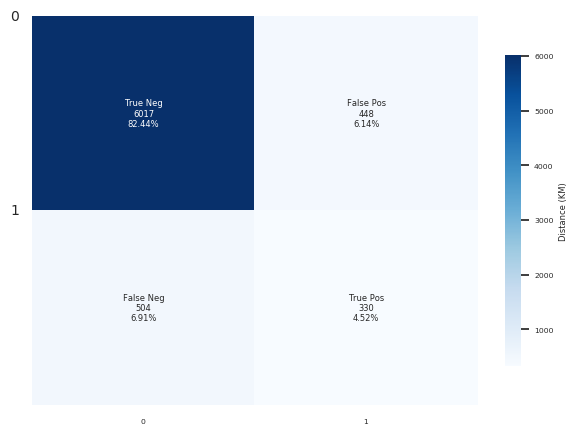




              precision    recall  f1-score   support

    good car       0.92      0.93      0.93      6465
     bad car       0.42      0.40      0.41       834

    accuracy                           0.87      7299
   macro avg       0.67      0.66      0.67      7299
weighted avg       0.87      0.87      0.87      7299



'\nInterpretation:\n\nRecall: 40% of all cars that exist as "bad cars" in real terms are classified as "bad cars". \nPrecision: Of these, 42% are correctly classified. \n\n'

In [47]:
# plot heatmap
fig, ax = plt.subplots(figsize=(20, 14))
%matplotlib inline

confusion_matrix_model = confusion_matrix(target_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_model.flatten()/np.sum(confusion_matrix_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=0.5)
sns.heatmap(confusion_matrix_model, annot=labels, fmt='', cmap='Blues',cbar_kws={"shrink":.8, "label": "Distance (KM)"})
plt.yticks(np.arange(3),rotation=0, fontsize="10", va="center")



plt.show()

print('\n\n')
#Classification Report
c_r = classification_report(target_test, y_pred, target_names=["good car", "bad car"])
print(c_r)



"""
Interpretation:

Recall: 40% of all cars that exist as "bad cars" in real terms are classified as "bad cars". 
Precision: Of these, 42% are correctly classified. 

"""

In [48]:
################################################################################################################
###########################################15. Addition: Interpretation with SHAP###############################
################################################################################################################

In [49]:
"""
In order to not just have a model that can give the car dealer a practical hand up to make a better purchase decision, representations 
of the effects of each feature on the target variable are for helpful to get a deeper understanding of the data set, 
and not let the model make the decision for or against a purchase. A better understanding of the data set can still help to make a better decision.

SHAP Values

SHAP values indicate the strength and direction of the relationship, as well as the interactions and importance of the features. 
SHAP values are the average marginal contributions to the prediction in relation to all other contributions. 
It is to be interpreted in the manner of a cross-sectional design with logistic regression. 
Causal inferences are not possible with this design or method.


Please note:

Only some features are selected as an example for explanation!

A complete analysis would certainly be appropriate for an order, but this would go beyond the scope here.

"""

'\nIn order to not just have a model that can give the car dealer a practical hand up to make a better purchase decision, representations \nof the effects of each feature on the target variable are for helpful to get a deeper understanding of the data set, \nand not let the model make the decision for or against a purchase. A better understanding of the data set can still help to make a better decision.\n\nSHAP Values\n\nSHAP values indicate the strength and direction of the relationship, as well as the interactions and importance of the features. \nSHAP values are the average marginal contributions to the prediction in relation to all other contributions. \nIt is to be interpreted in the manner of a cross-sectional design with logistic regression. \nCausal inferences are not possible with this design or method.\n\n\nPlease note:\n\nOnly some features are selected as an example for explanation!\n\nA complete analysis would certainly be appropriate for an order, but this would go beyond

In [50]:
shap.initjs()

#Import Model
model = pickle.load(open('grid_main_xgb.p', 'rb'))

#Fitted model
model_shap = model.best_estimator_.named_steps['model']

#Transform with fitted Column Transformer
features_train_trans_1 = model.best_estimator_.named_steps['transformer'].transform(features_train)
features_train_trans = pd.DataFrame(features_train_trans_1, columns = cols_kat + cols_num_2 + ['pca_1', 'pca_2', 'pca_3'])

#Only transform with PCA for displaying the correct values
features_train_PCA = model.best_estimator_.named_steps['transformer'].transformers_[2][1].transform(features_train.loc[:,cols_pca])
features_train_display = features_train.loc[:,cols_kat+cols_num_2]
features_train_display.loc[:,['pca_1', 'pca_2', 'pca_3']] = features_train_PCA


#Generate shap values
explainer = shap.TreeExplainer(model_shap)
shap_values = explainer.shap_values(model.best_estimator_[:-1].transform(features_train))
sv = explainer(model.best_estimator_[:-1].transform(features_train))
exp = Explanation(sv.values ,
                  sv.base_values, 
                  data=features_train_trans.values, 
                  feature_names=features_train_trans.columns)


#Shap values for Interactions
shap_interaction_values = explainer.shap_interaction_values(model.best_estimator_[:-1].transform(features_train))

'\nBlue: Low values of the feature\nRed: High values of the feature\nSince we have a binary target, the values are log odds. \n\n\n\nIn the following barplot, the importance of the features is shown vertically in order. \n\nThe categorical feature Felgen_ID (Rim_ID) is the most important feature and contributes the most to the prediction.\nHigh values of rim_ID are most dominant for prediction.\n\nLow values of the numeric feature Baujahr (Year of manufacture) are most dominant for prediction \nand is ranked 2nd.\n\nHigh values of Jahr_Monjat_Buy_A (Year_Month_Buy_A) are most dominant for prediction and is on rank 3.\n\n\n\nRoughly speaking, the priority is as follows in general terms:\n\n\nRims_ID (very strange)\nWhen was the car built?\nWhen was the car purchased?\nCosts\nSeller information (buyer number, zip code)\nCar and auction seller details (mileage, auction seller, American manufacturer, warranty cost).\n'

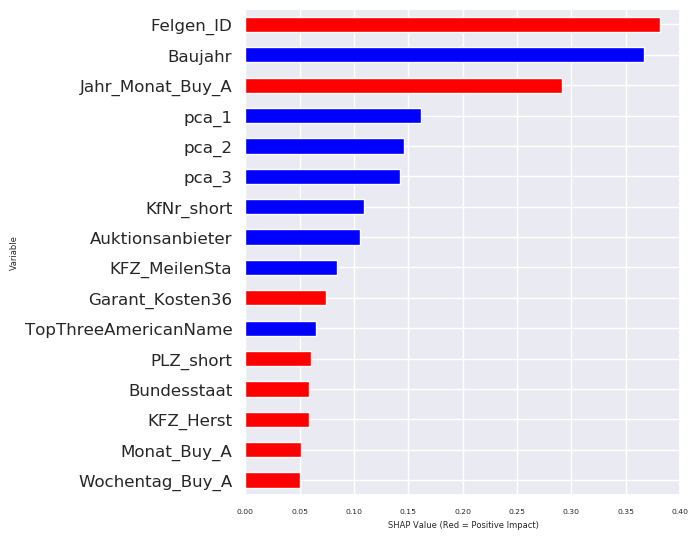

In [51]:
#Bar plot with poisitive and negative relationship

def ABS_SHAP(df_shap,df):
 
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    plt.rc('ytick', labelsize=12)
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
      
       


ABS_SHAP(shap_values,features_train_trans)



"""
Blue: Low values of the feature
Red: High values of the feature
Since we have a binary target, the values are log odds. 



In the following barplot, the importance of the features is shown vertically in order. 

The categorical feature Felgen_ID (Rim_ID) is the most important feature and contributes the most to the prediction.
High values of rim_ID are most dominant for prediction.

Low values of the numeric feature Baujahr (Year of manufacture) are most dominant for prediction 
and is ranked 2nd.

High values of Jahr_Monjat_Buy_A (Year_Month_Buy_A) are most dominant for prediction and is on rank 3.



Roughly speaking, the priority is as follows in general terms:


Rims_ID (very strange)
When was the car built?
When was the car purchased?
Costs
Seller information (buyer number, zip code)
Car and auction seller details (mileage, auction seller, American manufacturer, warranty cost).
"""


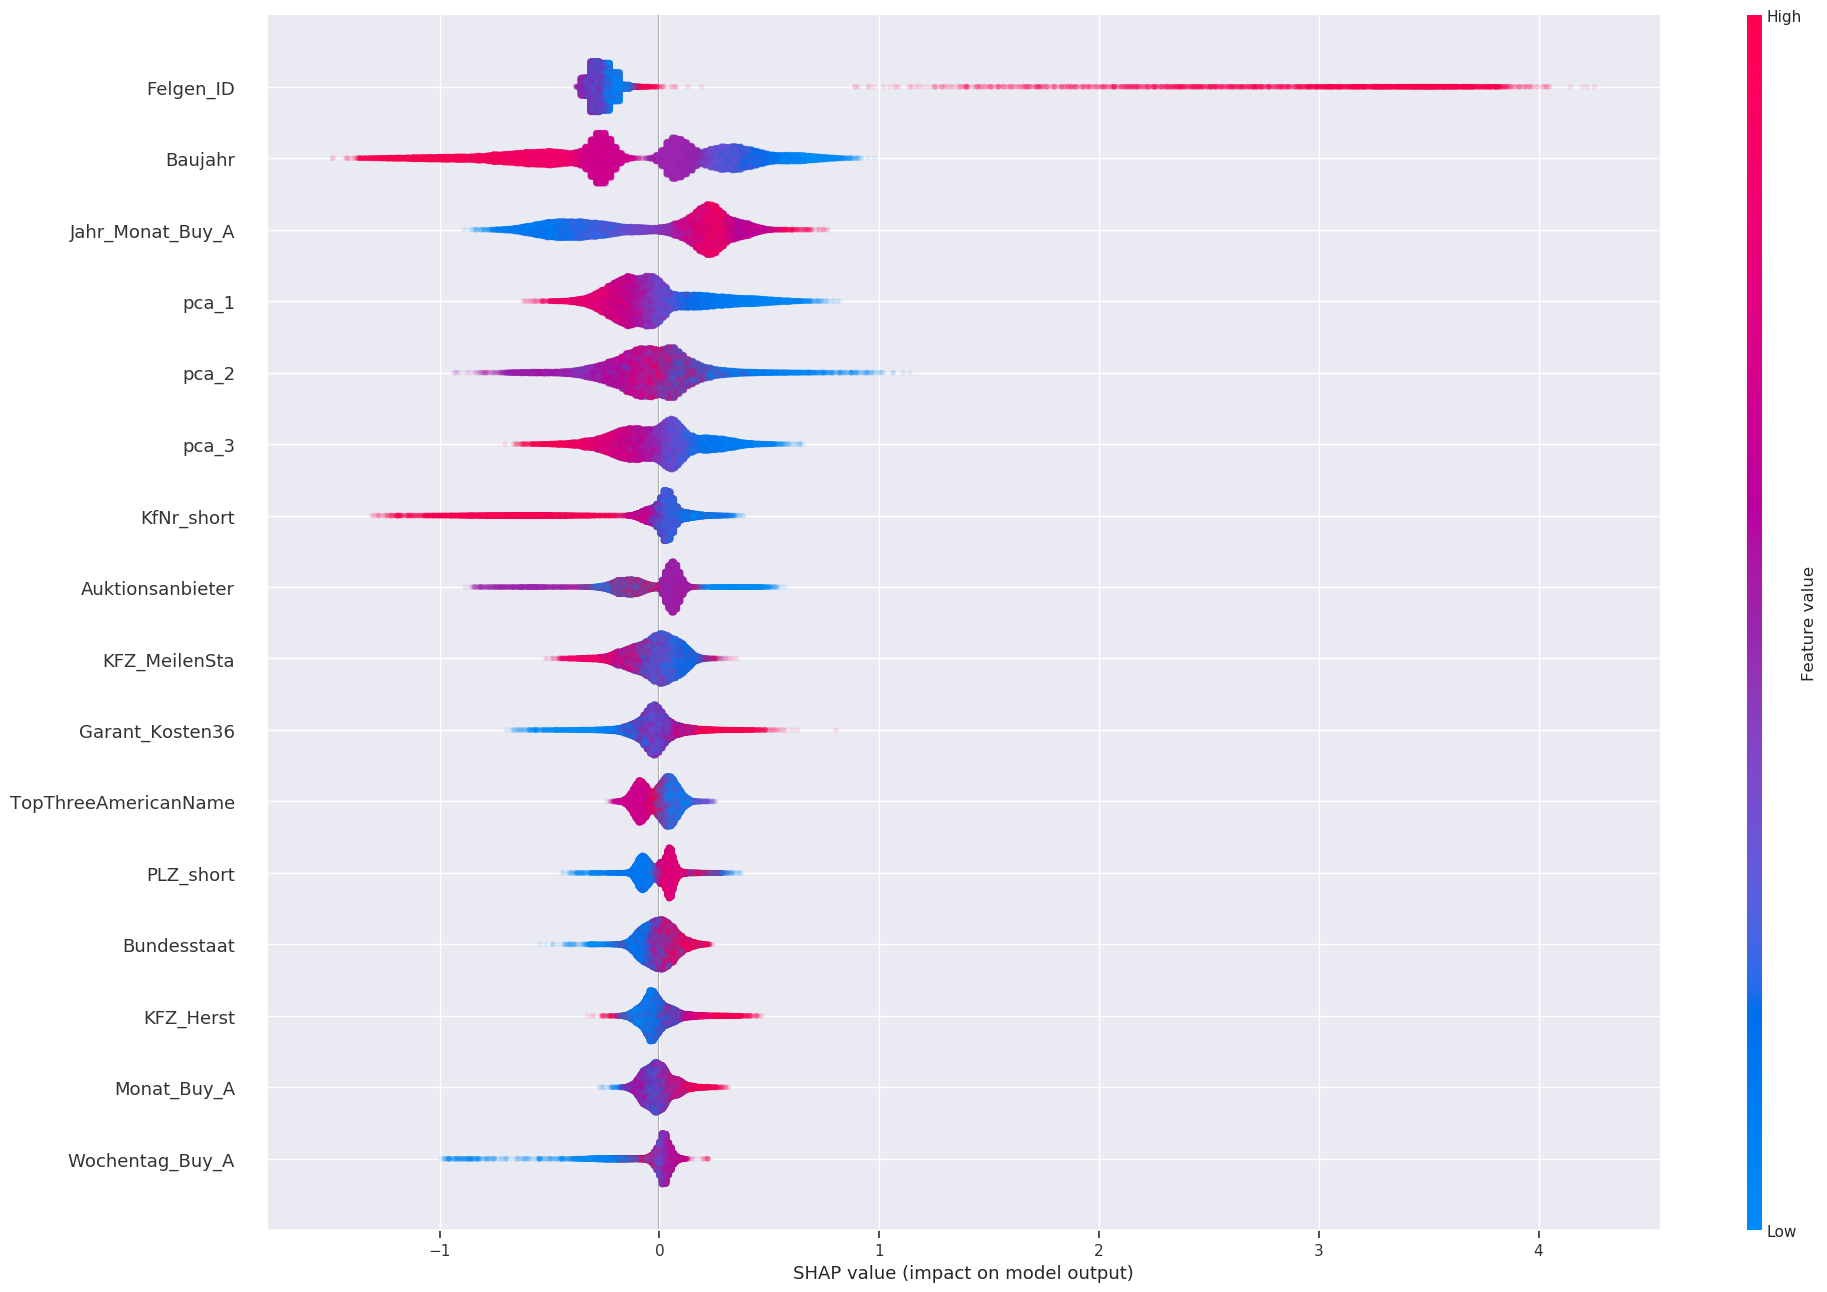

'\n\nWith the following Beeswarm plot, you can look even deeper into the effects of the features. \n\nFelgen_ID  (Rims_ID)\nFor example, some observations at Felgen_ID are kind of outliers, far away from all other observations,\nand due to the division into the red and blue colors, the directions of the effects are categorically \nseparated for this feature. One characteristic seems to have an incredible impact. \nThis must be tested in a single plot because this feature is categorical. \n\nBaujahr (manufacture)\nLow values of year of Baujahr contribute to a higher prediction of "bad car", while high \nvalues do not. This is only logical: since the car with lower values is older and thus more \nprone to errors. This effect appears to be equally continuous based on the continuous coloring \nfrom red to blue. This is checked in individual plots.\n\nJahr_Monat_Buy_A (time of purchase)\nThe feature Jahr_Monat_Buy_A indicates in which year and month the car was bought. \nHigh values of this

In [52]:
#Beeswarm

from shap.plots import beeswarm


fig = plt.figure()
shap.plots.beeswarm(exp, show = False,max_display = 30, alpha=0.1)
plt.gcf().set_size_inches(20,15)
plt.show()


"""

With the following Beeswarm plot, you can look even deeper into the effects of the features. 

Felgen_ID  (Rims_ID)
For example, some observations at Felgen_ID are kind of outliers, far away from all other observations,
and due to the division into the red and blue colors, the directions of the effects are categorically 
separated for this feature. One characteristic seems to have an incredible impact. 
This must be tested in a single plot because this feature is categorical. 

Baujahr (manufacture)
Low values of year of Baujahr contribute to a higher prediction of "bad car", while high 
values do not. This is only logical: since the car with lower values is older and thus more 
prone to errors. This effect appears to be equally continuous based on the continuous coloring 
from red to blue. This is checked in individual plots.

Jahr_Monat_Buy_A (time of purchase)
The feature Jahr_Monat_Buy_A indicates in which year and month the car was bought. 
High values of this feature are more likely to be associated with a high prediction of "bad car" 
than with lower values. This is also checked with a single plot.


pca_
The pca features, which represent costs for the car, depict expected relationships: 
The cheaper a car, the more likely it is that a "bad car" will be purchased.
"""




'\nThe following plot shows the main effects and interaction effects. The diagonal shows \nonly the main effects. There we find the four features just presented again, which also \nshow the highest values for the main effects.\n\nThe most significant interaction effects are:\n\nYear_Month_Buy_A + pca_2 and Rims_ID + Auction Provider.\n'

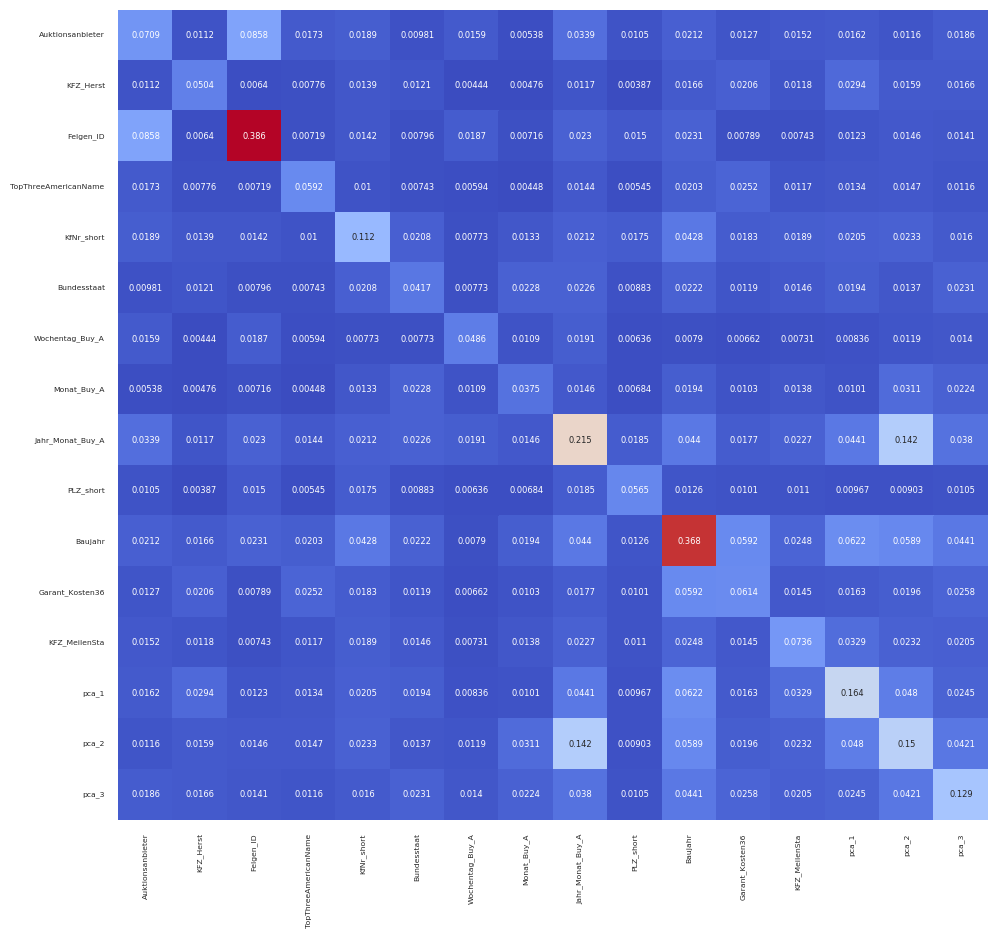

In [53]:
#Interaction Heatplot


mean_shap = np.abs(shap_interaction_values).mean(0)
df = pd.DataFrame(mean_shap,index=features_train_display.columns,columns=features_train_display.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=0.5)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 


"""
The following plot shows the main effects and interaction effects. The diagonal shows 
only the main effects. There we find the four features just presented again, which also 
show the highest values for the main effects.

The most significant interaction effects are:

Year_Month_Buy_A + pca_2 and Rims_ID + Auction Provider.
"""



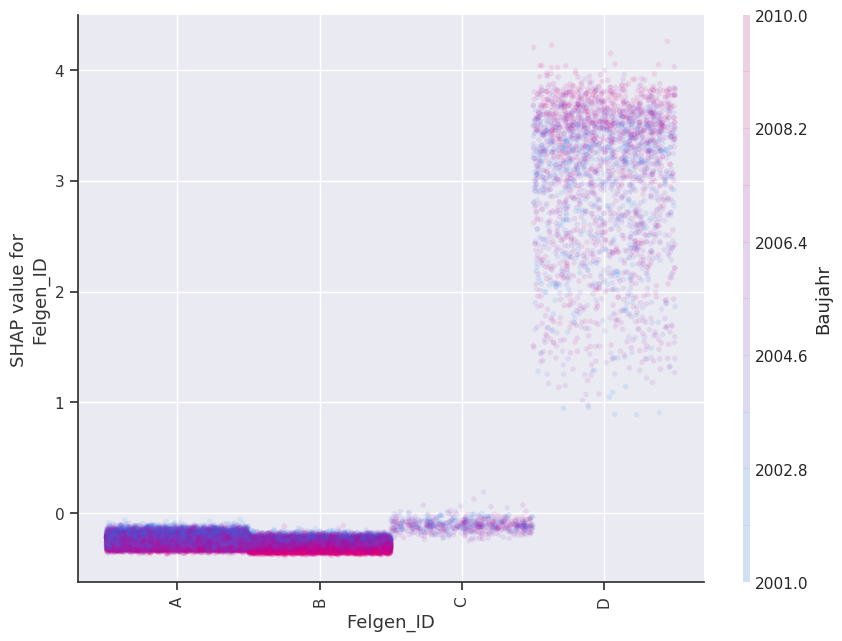

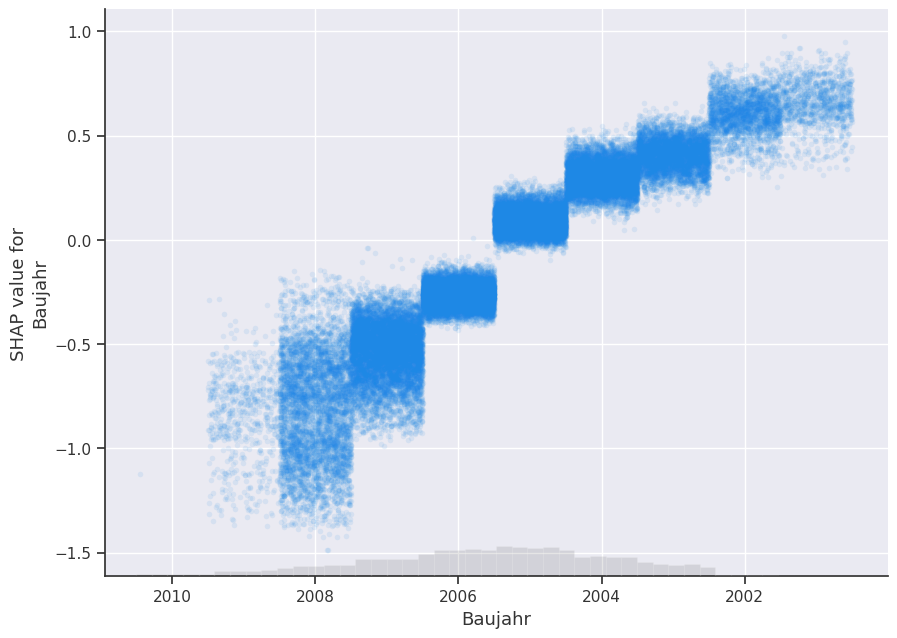

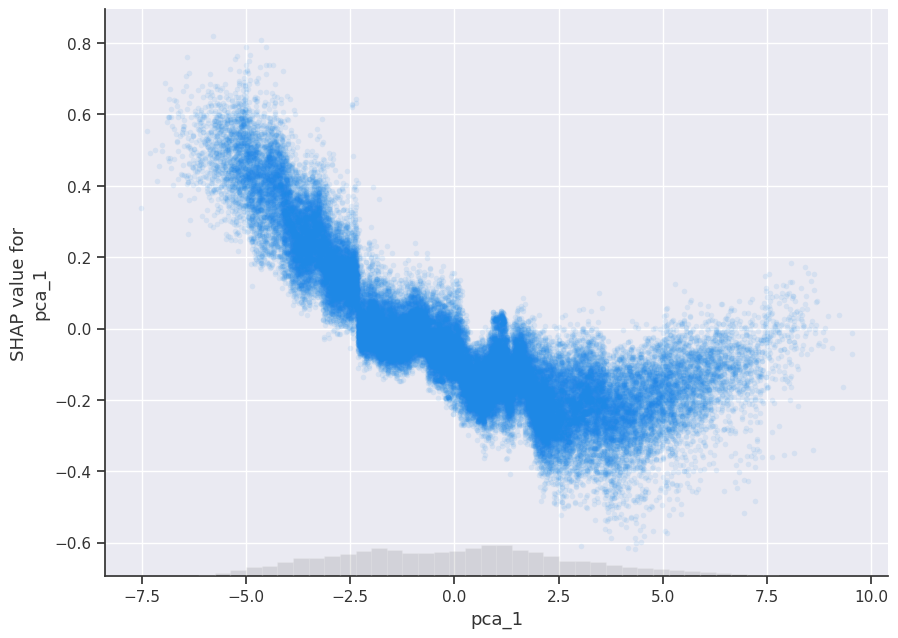

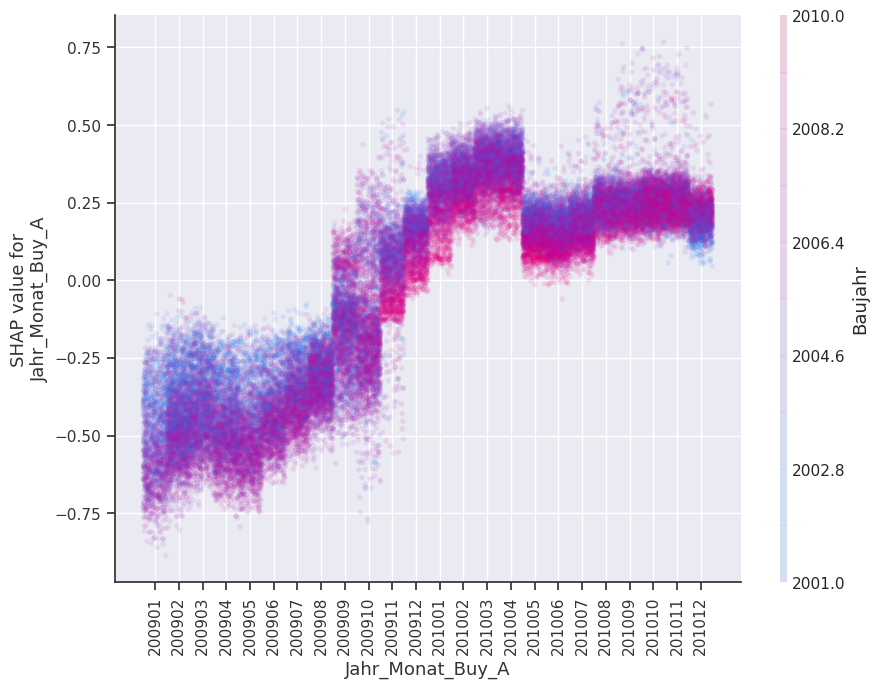

'\nJahr_Monat_Buy_A (time of purchase)\nThe year in which the cars were purchased is also relevant. The probability of buying a \n"bad car" rises sharply from September 2009, but falls sharply again from May 2010. Cars \nthat are somewhat younger in year of manufacture, however, again reduce the probability.\nIn the fall and winter months, however, there are outliers to the upside, so that some \ncaution may be called for here when making a purchase. \n'

In [54]:
#Dependence plot

fig,ax = plt.subplots(figsize=(9,7)) 
shap.dependence_plot('Felgen_ID', sv.values ,features_train_trans, display_features=features_train_display, 
                     alpha=0.1, x_jitter=1, show=False,ax=ax)
plt.show()

"""
Felgen_ID (Rims_ID)
As mentioned above, there is some kind of outlier to be found in Felgen_ID. 
The category "D" seems to be the feature that is most significant for predicting 
the whole model.The interaction with year of manufacture, which is automatically 
selected because of the highest value, has no consistent effect, even though younger cars with type D 
rims probably increase the probability of buying a "bad car". 
"""



#SHAP scatter plots
fig,ax = plt.subplots(figsize=(9,7)) 
shap.plots.scatter(exp[...,"Baujahr"], show=False,ax=ax,alpha=0.1, x_jitter=1,)
ax.invert_xaxis()
plt.show()

"""

Baujahr (manufacture)
As suspected, there is a quasi-linear effect between year of Baujahr and the 
target variable: the older the cars, the more likely the purchase of a "bad car". 

"""


fig,ax = plt.subplots(figsize=(9,7)) 
shap.plots.scatter(exp[...,"pca_1"],ax=ax, show=False,alpha=0.1, x_jitter=1,)
plt.show()


"""
Equally expected is the effect of cost on the likelihood of buying a "cash car." 
The more expensive the cars become, the less likely the purchase of a "bad car" becomes. 
Cheaper cars are probably also those cars that are also more likely to be "bad cars". 
However, the effect is not linear: For the most expensive cars, the effect cancels out 
again and the probability of buying a "bad car" rises again slightly.
"""



fig,ax = plt.subplots(figsize=(9,7)) 
shap.dependence_plot('Jahr_Monat_Buy_A', sv.values ,features_train_trans, display_features=features_train_display, 
                     alpha=0.1, x_jitter=1,ax=ax, show=False)
plt.show()



"""
Jahr_Monat_Buy_A (time of purchase)
The year in which the cars were purchased is also relevant. The probability of buying a 
"bad car" rises sharply from September 2009, but falls sharply again from May 2010. Cars 
that are somewhat younger in year of manufacture, however, again reduce the probability.
In the fall and winter months, however, there are outliers to the upside, so that some 
caution may be called for here when making a purchase. 
"""

In [55]:
################################################################################################################
###########################################16. Addition: Advice to the client###################################
################################################################################################################

In [56]:
"""
As a piece of advice to the client:

He should pay attention to concrete features in addition to the predictions of the model:

1. Felgen_ID (Rim_ID) "D" can be a sure sign of a "bad car".

2. It should be new AND expensive if possible. Older and cheap cars have a greater 
risk of buying a "bad car".

3. The time of purchase can be decisive: The level may change from year to year. 
In particular, there are outliers in the fall and winter months towards a higher 
probability of buying a "bad car". 
"""



'\nAs a piece of advice to the client:\n\nHe should pay attention to concrete features in addition to the predictions of the model:\n\n1. Felgen_ID (Rim_ID) "D" can be a sure sign of a "bad car".\n\n2. It should be new AND expensive if possible. Older and cheap cars have a greater \nrisk of buying a "bad car".\n\n3. The time of purchase can be decisive: The level may change from year to year. \nIn particular, there are outliers in the fall and winter months towards a higher \nprobability of buying a "bad car". \n'